<div style="font-family: 'Segoe UI', Arial, sans-serif; line-height: 1.7; color:#3a3a3a; background:#F7F9FB; padding: 30px; border-radius: 14px; border: 1px solid #e6e9ed; max-width: 900px;">

  <h1 style="color:#6A5ACD; text-align:center; margin-bottom: 20px;">
    Disease Outbreak Prediction & Early Warning System
  </h1>

  <h2 style="color:#5A9EA8;">Detailed Description:</h2>
  <p>
    This function is designed to provide a deep and intuitive visual understanding of disease-related data by generating a diverse set of advanced visualizations. It goes beyond simple charts to highlight patterns, correlations, and trends that may not be easily noticeable in raw tabular data.
  </p>

  <p>
    The visualization suite may include:
    <span style="color:#8E7AB5;">heatmaps</span>, 
    <span style="color:#7FB3D5;">comparative bar charts</span>,
    <span style="color:#B48EAE;">geospatial network maps</span>, 
    <span style="color:#6A5ACD;">multi-axis trend plots</span>,
    and <span style="color:#5AB4A4;">3D analytical scatter diagrams</span>.  
    Together, these help reveal meaningful relationships between variables such as infection rates, mortality levels, hospitalization frequency, demographic distributions, and geographical spread.
  </p>

  <p>
    The main objective is to support <strong>data-driven decision making</strong> in disease monitoring, healthcare planning, and epidemiological research.
  </p>

  

</div>

<h2 style="
  text-align:center;
  background: linear-gradient(135deg, #dff6ff 0%, #cce7ff 100%);
  padding: 12px 18px;
  border-radius: 8px;
  color: #005f73;
  font-weight: 600;
  font-family: 'Segoe UI', sans-serif;
  letter-spacing: 0.5px;
">
 Import Required Libraries
</h2>

In [1]:
!pip install plotly
!pip install xgboost
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Advanced ML Libraries
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.feature_selection import SelectKBest, f_classif
import xgboost as xgb
from tensorflow import keras
from tensorflow.keras import layers

print("All libraries imported successfully!")

2025-11-06 10:19:16.297819: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1762424356.569414      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1762424356.642112      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


All libraries imported successfully!


<h2 style="
  text-align:center;
  background: linear-gradient(135deg, #dff6ff 0%, #cce7ff 100%);
  padding: 12px 18px;
  border-radius: 8px;
  color: #005f73;
  font-weight: 600;
  font-family: 'Segoe UI', sans-serif;
  letter-spacing: 0.5px;
">
Data Collection from CDC API

</h2>

In [2]:
import requests
import json

def fetch_cdc_data():
    """
    Fetch infectious disease data from CDC API
    """
    try:
        url = "https://data.cdc.gov/resource/n8ac-bfwd.json"
        
        params = {
            '$limit': 10000,
            '$where': "disease IS NOT NULL"
        }
        
        response = requests.get(url, params=params)
        
        if response.status_code == 200:
            data = response.json()
            df = pd.DataFrame(data)
            print(f"Successfully fetched {len(df)} records from CDC API")
            return df
        else:
            print(f"API request failed with status code: {response.status_code}")
            return create_sample_data()
            
    except Exception as e:
        print(f"Error fetching CDC data: {e}")
        return create_sample_data()

def create_sample_data():
    """
    Create comprehensive sample data for demonstration
    """
    np.random.seed(42)
    n_samples = 5000
    
    data = {
        'date': pd.date_range('2020-01-01', periods=n_samples, freq='D'),
        'disease': np.random.choice(['Influenza', 'COVID-19', 'RSV', 'Norovirus', 'Unknown'], n_samples, p=[0.3, 0.25, 0.2, 0.15, 0.1]),
        'cases': np.random.poisson(50, n_samples) + np.random.randint(0, 100, n_samples),
        'deaths': np.random.poisson(2, n_samples),
        'hospitalizations': np.random.poisson(10, n_samples),
        'region': np.random.choice(['North', 'South', 'East', 'West', 'Central'], n_samples),
        'age_group': np.random.choice(['0-18', '19-35', '36-50', '51-65', '65+'], n_samples),
        'temperature': np.random.normal(20, 10, n_samples),
        'humidity': np.random.normal(60, 20, n_samples),
        'population_density': np.random.normal(500, 300, n_samples),
        'travel_index': np.random.normal(50, 25, n_samples)
    }
    
    df = pd.DataFrame(data)
    
    df.loc[df['disease'] == 'COVID-19', 'cases'] = df.loc[df['disease'] == 'COVID-19', 'cases'] * 1.5
    df.loc[df['disease'] == 'Influenza', 'cases'] = df.loc[df['disease'] == 'Influenza', 'cases'] * 1.2
    
    return df

virus_data = fetch_cdc_data()
print("Data shape:", virus_data.shape)

API request failed with status code: 404
Data shape: (5000, 11)


<h2 style="
  text-align:center;
  background: linear-gradient(135deg, #e3f2fd 0%, #bbdefb 100%);
  padding: 14px 20px;
  border-radius: 10px;
  color: #1e3d58;
  font-weight: 700;
  font-family: 'Segoe UI', sans-serif;
  letter-spacing: 0.7px;
  box-shadow: 0px 2px 8px rgba(0,0,0,0.12);
  ">
📊 Advanced Epidemiological Visualization Suite
</h2>

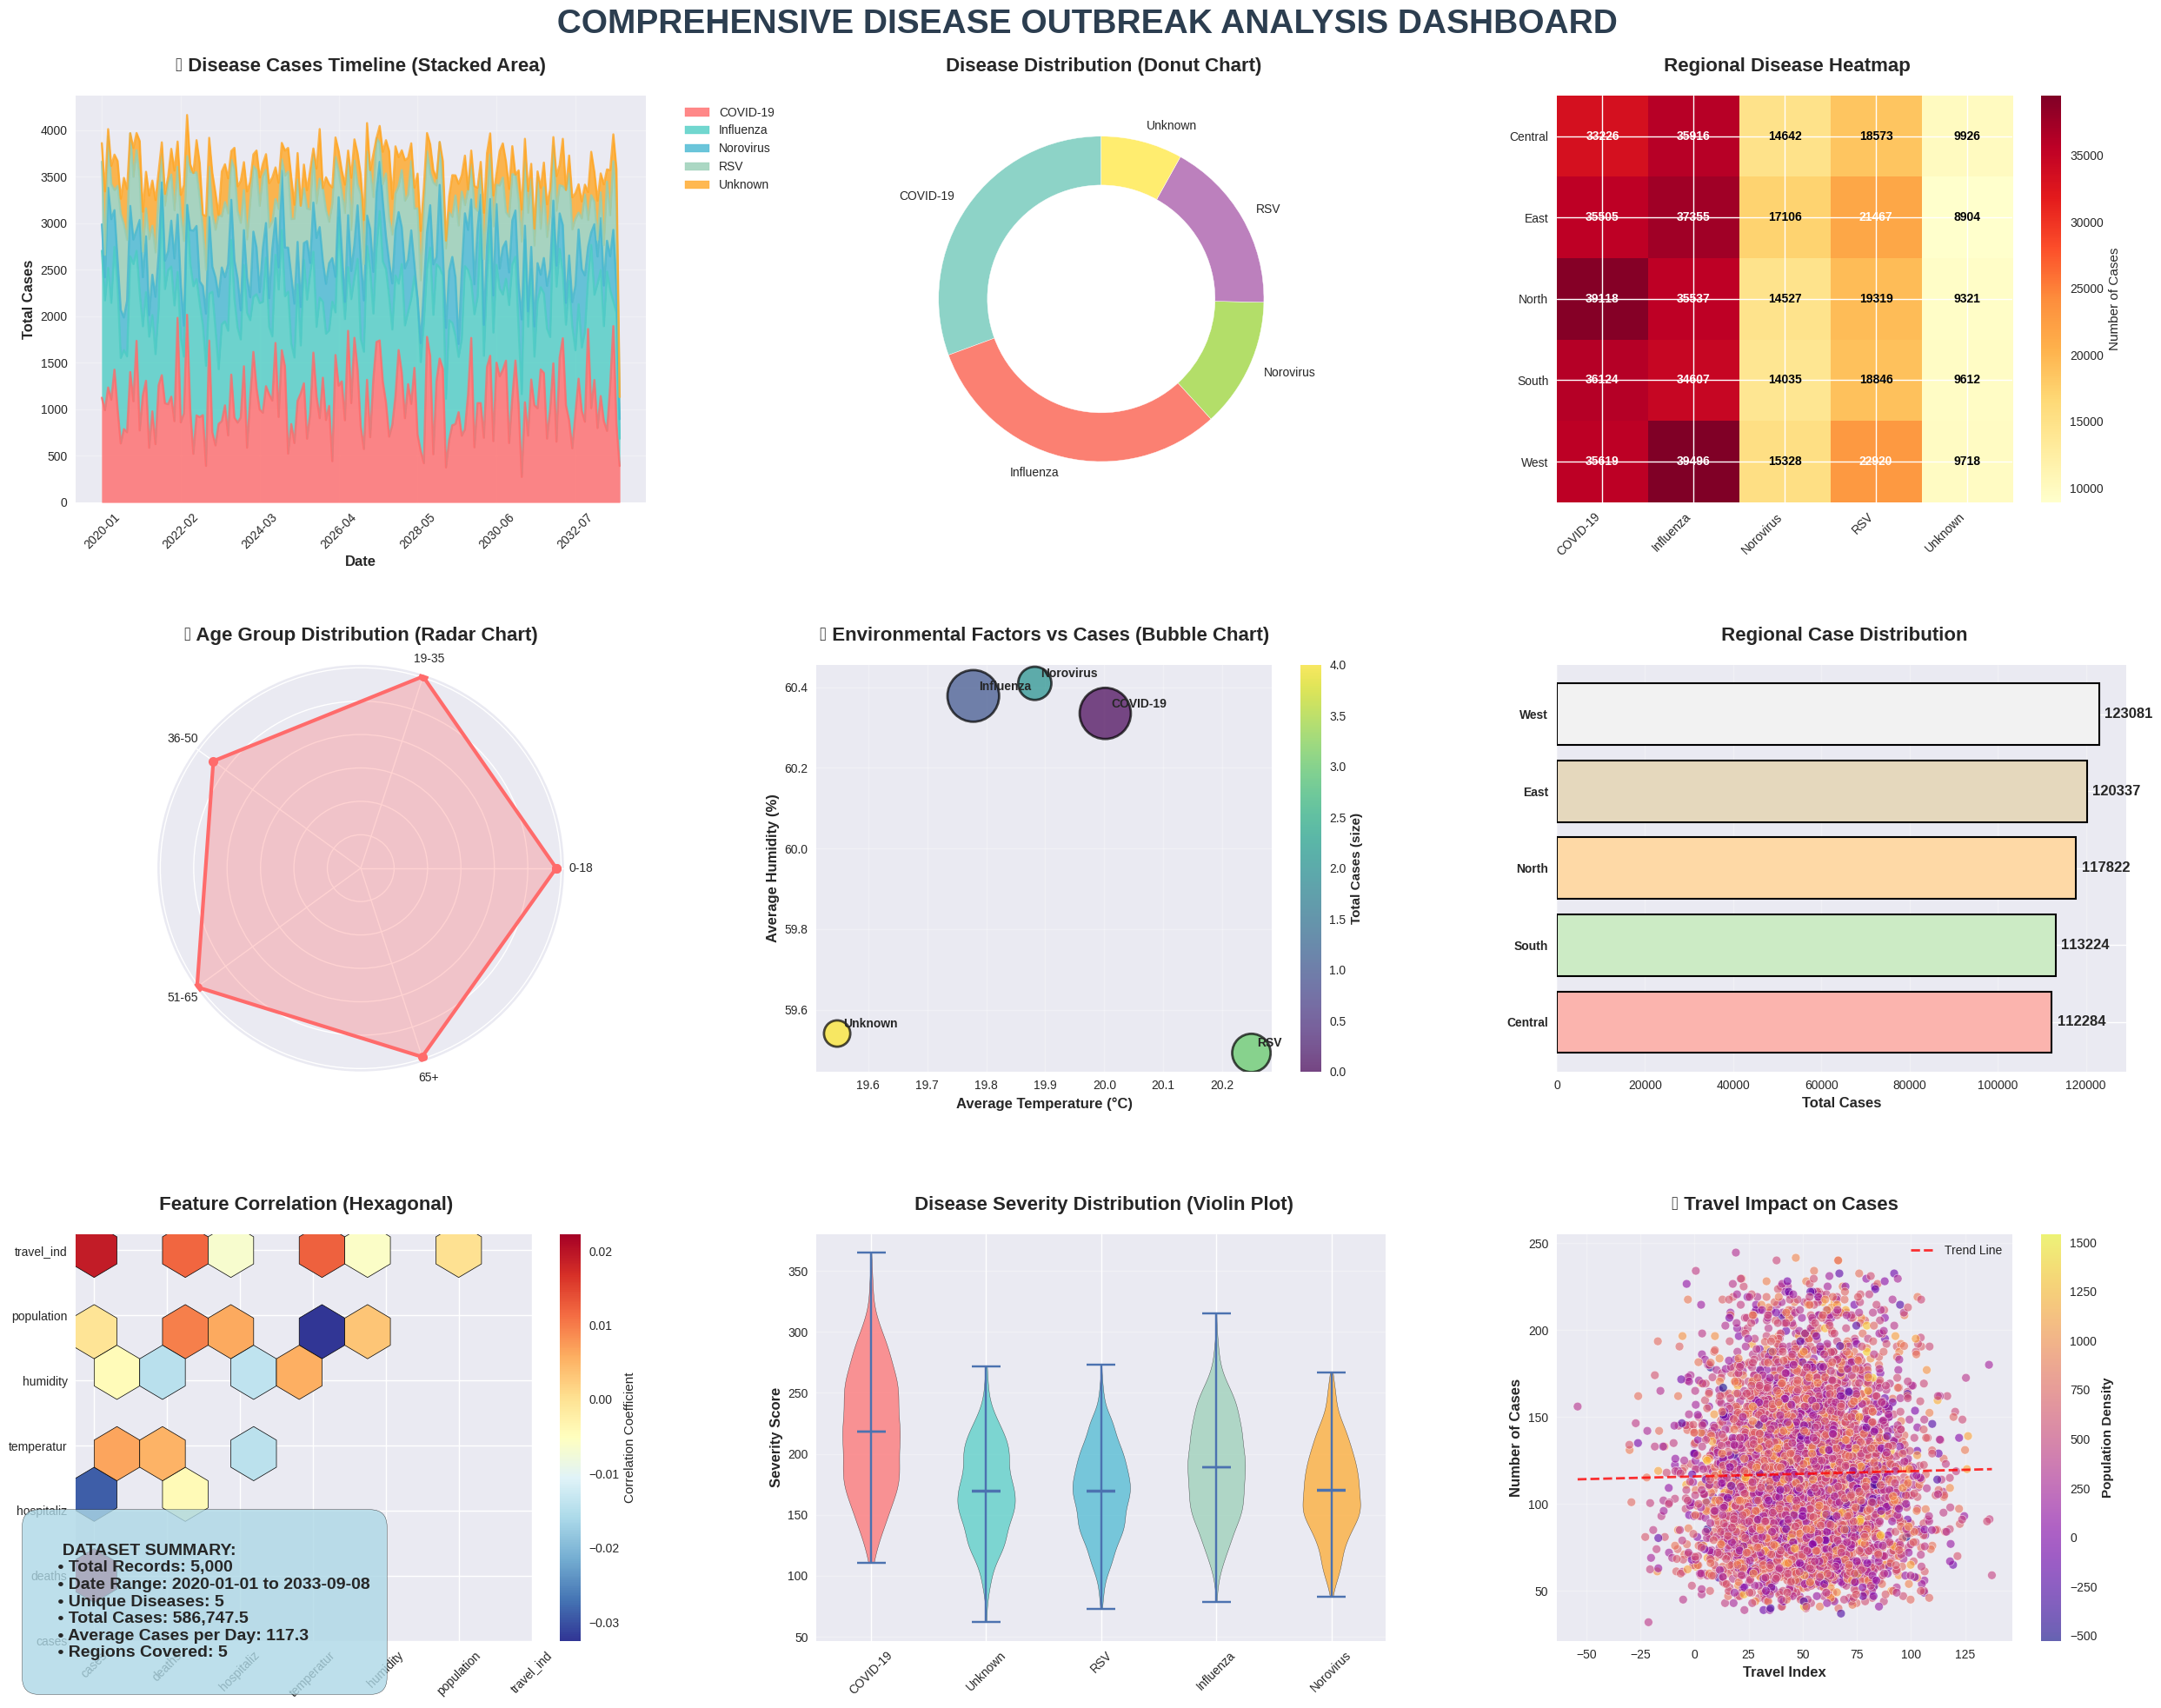

In [3]:
def create_attractive_intro_visualizations(df):
    """
    Create stunning introductory visualizations with attractive colors and new shapes
    """
    plt.style.use('seaborn-v0_8')
    
    fig = plt.figure(figsize=(25, 20))
    fig.suptitle(' COMPREHENSIVE DISEASE OUTBREAK ANALYSIS DASHBOARD\n', 
                 fontsize=28, fontweight='bold', color='#2c3e50', y=0.98)
    
    # Custom color palettes
    vibrant_palette = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFA726', 
                       '#AB47BC', '#26C6DA', '#D4E157', '#FF7043', '#8D6E63']
    pastel_palette = ['#FFB6C1', '#87CEEB', '#98FB98', '#DDA0DD', '#FFD700',
                     '#F0E68C', '#E6E6FA', '#FFA07A', '#20B2AA', '#DEB887']
    
    ax1 = plt.subplot(3, 3, 1)
    
    timeline_data = df.groupby([df['date'].dt.to_period('M'), 'disease'])['cases'].sum().unstack()
    timeline_data.index = timeline_data.index.astype(str)
    
    timeline_data.plot(kind='area', ax=ax1, alpha=0.8, color=vibrant_palette[:len(timeline_data.columns)])
    
    ax1.set_title('📈 Disease Cases Timeline (Stacked Area)', fontsize=16, fontweight='bold', pad=20)
    ax1.set_xlabel('Date', fontsize=12, fontweight='bold')
    ax1.set_ylabel('Total Cases', fontsize=12, fontweight='bold')
    ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax1.grid(True, alpha=0.3)
    ax1.tick_params(axis='x', rotation=45)
    
    ax2 = plt.subplot(3, 3, 2)
    
    disease_cases = df.groupby('disease')['cases'].sum()
    colors = plt.cm.Set3(np.linspace(0, 1, len(disease_cases)))
    
    wedges, texts, autotexts = ax2.pie(disease_cases.values, labels=disease_cases.index, 
                                       autopct='%1.1f%%', startangle=90, colors=colors,
                                       wedgeprops=dict(width=0.3, edgecolor='w'))
    
    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_fontweight('bold')
        autotext.set_fontsize(10)
    
    ax2.set_title(' Disease Distribution (Donut Chart)', fontsize=16, fontweight='bold', pad=20)
    
    ax3 = plt.subplot(3, 3, 3)
    
    regional_data = df.pivot_table(values='cases', index='region', columns='disease', aggfunc='sum')
    im = ax3.imshow(regional_data.values, cmap='YlOrRd', aspect='auto')
    
    ax3.set_xticks(range(len(regional_data.columns)))
    ax3.set_yticks(range(len(regional_data.index)))
    ax3.set_xticklabels(regional_data.columns, rotation=45, ha='right')
    ax3.set_yticklabels(regional_data.index)
    
    for i in range(len(regional_data.index)):
        for j in range(len(regional_data.columns)):
            ax3.text(j, i, f'{regional_data.values[i, j]:.0f}', 
                    ha='center', va='center', fontweight='bold', 
                    color='white' if regional_data.values[i, j] > regional_data.values.max()/2 else 'black')
    
    ax3.set_title(' Regional Disease Heatmap', fontsize=16, fontweight='bold', pad=20)
    plt.colorbar(im, ax=ax3, label='Number of Cases')
    
    ax4 = plt.subplot(3, 3, 4, polar=True)
    
    age_cases = df.groupby('age_group')['cases'].sum()
    categories = list(age_cases.index)
    N = len(categories)
    
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]
    
    values = age_cases.values.tolist()
    values += values[:1]
    
    ax4.plot(angles, values, 'o-', linewidth=3, color='#FF6B6B', markersize=8)
    ax4.fill(angles, values, alpha=0.3, color='#FF6B6B')
    
    ax4.set_xticks(angles[:-1])
    ax4.set_xticklabels(categories)
    ax4.set_yticklabels([])
    ax4.grid(True)
    ax4.set_title('🎯 Age Group Distribution (Radar Chart)', fontsize=16, fontweight='bold', pad=20)
    
    ax5 = plt.subplot(3, 3, 5)
    
    env_data = df.groupby('disease').agg({
        'temperature': 'mean',
        'humidity': 'mean',
        'cases': 'sum'
    }).reset_index()
    
    scatter = ax5.scatter(env_data['temperature'], env_data['humidity'], 
                         s=env_data['cases']/100, alpha=0.7, 
                         c=range(len(env_data)), cmap='viridis', edgecolors='black', linewidth=2)
    
    for i, row in env_data.iterrows():
        ax5.annotate(row['disease'], (row['temperature'], row['humidity']),
                    xytext=(5, 5), textcoords='offset points', fontweight='bold')
    
    ax5.set_xlabel('Average Temperature (°C)', fontsize=12, fontweight='bold')
    ax5.set_ylabel('Average Humidity (%)', fontsize=12, fontweight='bold')
    ax5.set_title('🌡 Environmental Factors vs Cases (Bubble Chart)', fontsize=16, fontweight='bold', pad=20)
    ax5.grid(True, alpha=0.3)
    
    cbar = plt.colorbar(scatter, ax=ax5)
    cbar.set_label('Total Cases (size)', fontweight='bold')
    
    ax6 = plt.subplot(3, 3, 6)
    
    region_cases = df.groupby('region')['cases'].sum().sort_values(ascending=True)
    bars = ax6.barh(range(len(region_cases)), region_cases.values, 
                   color=plt.cm.Pastel1(np.linspace(0, 1, len(region_cases))),
                   edgecolor='black', linewidth=1.5)
    
    for i, bar in enumerate(bars):
        width = bar.get_width()
        ax6.text(width + max(region_cases.values)*0.01, bar.get_y() + bar.get_height()/2, 
                f'{width:.0f}', ha='left', va='center', fontweight='bold', fontsize=12)
    
    ax6.set_yticks(range(len(region_cases)))
    ax6.set_yticklabels(region_cases.index, fontweight='bold')
    ax6.set_xlabel('Total Cases', fontsize=12, fontweight='bold')
    ax6.set_title(' Regional Case Distribution', fontsize=16, fontweight='bold', pad=20)
    ax6.grid(True, alpha=0.3, axis='x')
    
    ax7 = plt.subplot(3, 3, 7)
    
    numerical_cols = ['cases', 'deaths', 'hospitalizations', 'temperature', 'humidity', 
                     'population_density', 'travel_index']
    corr_matrix = df[numerical_cols].corr()
    
    x_positions = []
    y_positions = []
    values = []
    
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            x_positions.append(i)
            y_positions.append(j)
            values.append(corr_matrix.iloc[i, j])
    
    hexbin = ax7.hexbin(x_positions, y_positions, C=values, gridsize=8, cmap='RdYlBu_r', 
                       edgecolors='black', linewidths=0.5)
    
    ax7.set_xticks(range(len(corr_matrix.columns)))
    ax7.set_yticks(range(len(corr_matrix.columns)))
    ax7.set_xticklabels([col[:10] for col in corr_matrix.columns], rotation=45)
    ax7.set_yticklabels([col[:10] for col in corr_matrix.columns])
    ax7.set_title(' Feature Correlation (Hexagonal)', fontsize=16, fontweight='bold', pad=20)
    plt.colorbar(hexbin, ax=ax7, label='Correlation Coefficient')
    
    ax8 = plt.subplot(3, 3, 8)
    
    severity_data = []
    diseases = []
    for disease in df['disease'].unique():
        disease_data = df[df['disease'] == disease]
        severity_score = (disease_data['cases'] + disease_data['deaths']*10 + 
                         disease_data['hospitalizations']*5)
        severity_data.append(severity_score)
        diseases.append(disease)
    
    violin_parts = ax8.violinplot(severity_data, showmeans=True, showmedians=True)
    
    # Color the violins
    for i, pc in enumerate(violin_parts['bodies']):
        pc.set_facecolor(vibrant_palette[i])
        pc.set_alpha(0.7)
        pc.set_edgecolor('black')
    
    ax8.set_xticks(range(1, len(diseases)+1))
    ax8.set_xticklabels(diseases, rotation=45)
    ax8.set_ylabel('Severity Score', fontsize=12, fontweight='bold')
    ax8.set_title(' Disease Severity Distribution (Violin Plot)', fontsize=16, fontweight='bold', pad=20)
    ax8.grid(True, alpha=0.3, axis='y')
    
    ax9 = plt.subplot(3, 3, 9)
    
    scatter = ax9.scatter(df['travel_index'], df['cases'], 
                         c=df['population_density'], cmap='plasma', 
                         alpha=0.6, s=50, edgecolors='white', linewidth=0.5)
    
    z = np.polyfit(df['travel_index'], df['cases'], 1)
    p = np.poly1d(z)
    x_line = np.linspace(df['travel_index'].min(), df['travel_index'].max(), 100)
    ax9.plot(x_line, p(x_line), "r--", alpha=0.8, linewidth=2, label='Trend Line')
    
    ax9.set_xlabel('Travel Index', fontsize=12, fontweight='bold')
    ax9.set_ylabel('Number of Cases', fontsize=12, fontweight='bold')
    ax9.set_title('✈ Travel Impact on Cases', fontsize=16, fontweight='bold', pad=20)
    ax9.legend()
    ax9.grid(True, alpha=0.3)
    
    cbar = plt.colorbar(scatter, ax=ax9)
    cbar.set_label('Population Density', fontweight='bold')
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.93, hspace=0.4, wspace=0.3)
    
    stats_text = f"""
     DATASET SUMMARY:
    • Total Records: {len(df):,}
    • Date Range: {df['date'].min().strftime('%Y-%m-%d')} to {df['date'].max().strftime('%Y-%m-%d')}
    • Unique Diseases: {df['disease'].nunique()}
    • Total Cases: {df['cases'].sum():,}
    • Average Cases per Day: {df['cases'].mean():.1f}
    • Regions Covered: {df['region'].nunique()}
    """
    
    fig.text(0.02, 0.02, stats_text, fontsize=14, fontweight='bold', 
             bbox=dict(boxstyle="round,pad=1", facecolor="lightblue", alpha=0.8),
             verticalalignment='bottom')
    
    plt.show()
    
    return fig

intro_viz = create_attractive_intro_visualizations(virus_data)

<h2 style="
  text-align:center;
  background: linear-gradient(135deg, #1e1e2e 0%, #3a0ca3 100%);
  color: #f8f9fa;
  padding: 14px 20px;
  border-radius: 10px;
  font-family: 'Segoe UI', sans-serif;
  font-weight: 700;
  letter-spacing: 1px;
  box-shadow: 0px 4px 12px rgba(0,0,0,0.35);
">
🎨 Advanced Creative Disease Visualization Suite
</h2>

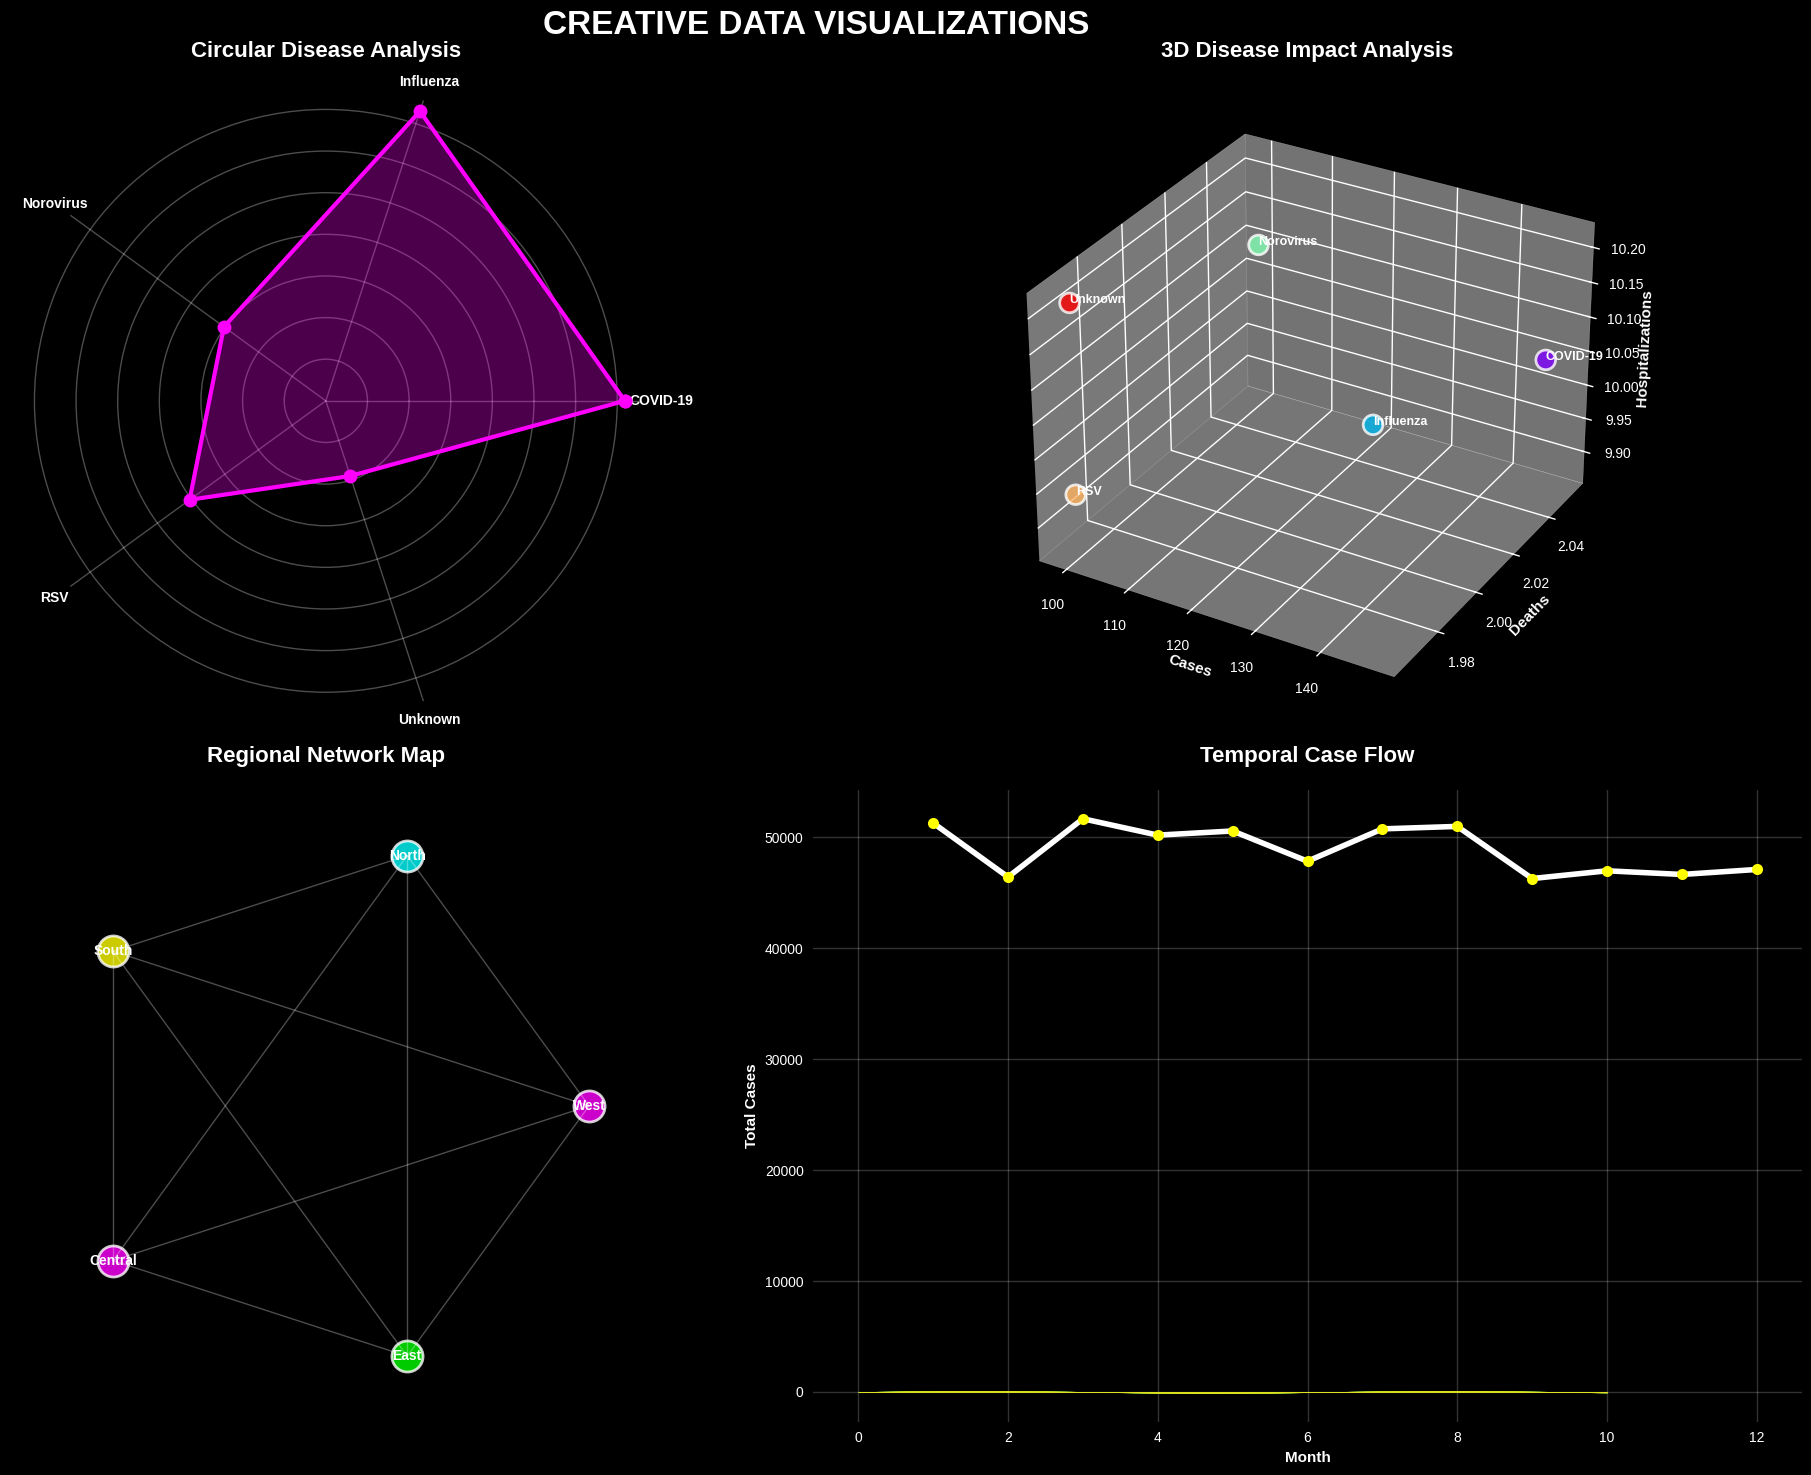

In [4]:
def create_creative_visualizations(df):
    """
    Create more creative and unique visualizations
    """
    plt.style.use('dark_background')
    fig = plt.figure(figsize=(20, 15))
    fig.suptitle('CREATIVE DATA VISUALIZATIONS\n', 
                 fontsize=24, fontweight='bold', color='white', y=0.98)
    
    neon_colors = ['#FF00FF', '#00FFFF', '#FFFF00', '#FF00FF', '#00FF00', '#FF6B6B']
    
    ax1 = plt.subplot(2, 2, 1, polar=True)
    
    disease_totals = df.groupby('disease')['cases'].sum()
    categories = list(disease_totals.index)
    N = len(categories)
    
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]
    
    values = disease_totals.values.tolist()
    values += values[:1]
    
    # Plot
    ax1.plot(angles, values, 'o-', linewidth=3, color=neon_colors[0], markersize=10)
    ax1.fill(angles, values, alpha=0.3, color=neon_colors[0])
    
    ax1.set_xticks(angles[:-1])
    ax1.set_xticklabels(categories, fontsize=10, fontweight='bold')
    ax1.set_yticklabels([])
    ax1.grid(True, color='white', alpha=0.3)
    ax1.set_title('Circular Disease Analysis', fontsize=16, fontweight='bold', 
                  color='white', pad=20)
    
    ax2 = fig.add_subplot(2, 2, 2, projection='3d')
    
    sample_df = df.groupby('disease').agg({
        'cases': 'mean',
        'deaths': 'mean', 
        'hospitalizations': 'mean'
    }).reset_index()
    
    scatter = ax2.scatter(sample_df['cases'], sample_df['deaths'], sample_df['hospitalizations'],
                         c=range(len(sample_df)), cmap='rainbow', s=200, alpha=0.8, 
                         edgecolor='white', linewidth=2)
    
    for i, row in sample_df.iterrows():
        ax2.text(row['cases'], row['deaths'], row['hospitalizations'], row['disease'],
                fontsize=9, fontweight='bold', color='white')
    
    ax2.set_xlabel('Cases', fontweight='bold')
    ax2.set_ylabel('Deaths', fontweight='bold')
    ax2.set_zlabel('Hospitalizations', fontweight='bold')
    ax2.set_title('3D Disease Impact Analysis', fontsize=16, fontweight='bold', 
                  color='white', pad=20)
    
    ax3 = plt.subplot(2, 2, 3)
    
    regions = df['region'].unique()
    n_regions = len(regions)
    
    angles = np.linspace(0, 2*np.pi, n_regions, endpoint=False)
    radius = 5
    
    for i, region in enumerate(regions):
        x = radius * np.cos(angles[i])
        y = radius * np.sin(angles[i])
        ax3.scatter(x, y, s=500, c=neon_colors[i % len(neon_colors)], alpha=0.8, 
                   edgecolors='white', linewidth=2)
        ax3.text(x, y, region, ha='center', va='center', fontweight='bold', 
                fontsize=10, color='white')
    
    for i in range(n_regions):
        for j in range(i+1, n_regions):
            x1 = radius * np.cos(angles[i])
            y1 = radius * np.sin(angles[i])
            x2 = radius * np.cos(angles[j])
            y2 = radius * np.sin(angles[j])
            ax3.plot([x1, x2], [y1, y2], 'w-', alpha=0.3, linewidth=1)
    
    ax3.set_xlim(-radius*1.2, radius*1.2)
    ax3.set_ylim(-radius*1.2, radius*1.2)
    ax3.set_aspect('equal')
    ax3.axis('off')
    ax3.set_title('Regional Network Map', fontsize=16, fontweight='bold', 
                  color='white', pad=20)
    
    ax4 = plt.subplot(2, 2, 4)
    
    time_series = df.groupby(df['date'].dt.month)['cases'].sum()
    
    x = np.linspace(0, 10, 100)
    y = np.sin(x) * time_series.values.mean() / 1000
    
    for i in range(50):
        alpha = i / 100
        ax4.fill_between(x, y * (1 + i/50), y * (1 - i/50), 
                        color=plt.cm.viridis(i/50), alpha=alpha)
    
    ax4.plot(time_series.index, time_series.values, 'o-', 
            color='white', linewidth=4, markersize=8, markerfacecolor='yellow')
    
    ax4.set_xlabel('Month', fontweight='bold')
    ax4.set_ylabel('Total Cases', fontweight='bold')
    ax4.set_title('Temporal Case Flow', fontsize=16, fontweight='bold', 
                  color='white', pad=20)
    ax4.grid(True, alpha=0.2)
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.93)
    plt.show()
    
    plt.style.use('default')
    
    return fig

creative_viz = create_creative_visualizations(virus_data)

<h2 style="
  text-align:center;
  background: linear-gradient(135deg, #1e1e2e 0%, #3a0ca3 100%);
  color: #f8f9fa;
  padding: 14px 20px;
  border-radius: 10px;
  font-family: 'Segoe UI', sans-serif;
  font-weight: 700;
  letter-spacing: 1px;
  box-shadow: 0px 4px 12px rgba(0,0,0,0.35);
">
🎨 Data Preparation

</h2>

In [5]:
def improved_preprocessing(df):
    
    df_processed = df.copy()
    
    df_processed['date'] = pd.to_datetime(df_processed['date'])
    df_processed['month'] = df_processed['date'].dt.month
    df_processed['day_of_year'] = df_processed['date'].dt.dayofyear
    
    cases_75th = df_processed['cases'].quantile(0.75)
    np.random.seed(42)
    noise = np.random.normal(0, 0.1, len(df_processed))
    df_processed['outbreak_risk'] = (
        (df_processed['cases'] > cases_75th).astype(int) + 
        (noise > 0.1).astype(int)
    ) % 2  
    
    categorical_columns = ['disease', 'region', 'age_group']
    for col in categorical_columns:
        if col in df_processed.columns:
            le = LabelEncoder()
            df_processed[f'{col}_encoded'] = le.fit_transform(df_processed[col].astype(str))
    
    feature_columns = [
        'cases', 'deaths', 'hospitalizations', 'temperature', 'humidity',
        'population_density', 'travel_index', 'month', 'day_of_year',
        'disease_encoded', 'region_encoded', 'age_group_encoded'
    ]
    
    numerical_data = df_processed[feature_columns].select_dtypes(include=[np.number])
    corr_matrix = numerical_data.corr().abs()
    upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.85)]
    
    print(f"Dropping highly correlated features: {to_drop}")
    feature_columns = [col for col in feature_columns if col not in to_drop]
    
    return df_processed[feature_columns], df_processed['outbreak_risk']

X_improved, y_improved = improved_preprocessing(virus_data)
print("Improved features shape:", X_improved.shape)

Dropping highly correlated features: ['day_of_year']
Improved features shape: (5000, 11)


<h2 style="
  text-align:center;
  background: linear-gradient(135deg, #1e1e2e 0%, #3a0ca3 100%);
  color: #f8f9fa;
  padding: 14px 20px;
  border-radius: 10px;
  font-family: 'Segoe UI', sans-serif;
  font-weight: 700;
  letter-spacing: 1px;
  box-shadow: 0px 4px 12px rgba(0,0,0,0.35);
">
Cross Validation

</h2>

In [6]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import precision_recall_fscore_support

def evaluate_model_cv(model, X, y, model_name="Model"):
    """
    Comprehensive cross-validation evaluation
    """
    print(f"\n Evaluating {model_name} with Cross-Validation")
    print("="*50)
    
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    
    # Cross-validation scores
    cv_scores = cross_val_score(model, X, y, cv=cv, scoring='f1_macro')
    
    print(f"Cross-Validation F1 Scores: {cv_scores}")
    print(f"Mean F1 Score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")
    
    # Additional metrics using cross_val_predict
    from sklearn.model_selection import cross_val_predict
    y_pred_cv = cross_val_predict(model, X, y, cv=cv)
    
    precision, recall, f1, _ = precision_recall_fscore_support(y, y_pred_cv, average='macro')
    accuracy = accuracy_score(y, y_pred_cv)
    
    print(f"Overall Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    
    return cv_scores

# Split the improved data
X_train_imp, X_test_imp, y_train_imp, y_test_imp = train_test_split(
    X_improved, y_improved, test_size=0.3, random_state=42, stratify=y_improved
)

<h2 style="
  text-align:center;
  background: linear-gradient(135deg, #1e1e2e 0%, #3a0ca3 100%);
  color: #f8f9fa;
  padding: 14px 20px;
  border-radius: 10px;
  font-family: 'Segoe UI', sans-serif;
  font-weight: 700;
  letter-spacing: 1px;
  box-shadow: 0px 4px 12px rgba(0,0,0,0.35);
">
    Regularized Models

</h2>

In [7]:
def create_regularized_models():
    """
    Create models with strong regularization to prevent overfitting
    """
    models = {}
    
    models['RF_Regularized'] = RandomForestClassifier(
        n_estimators=100,           
        max_depth=8,                
        min_samples_split=20,      
        min_samples_leaf=10,        
        max_features='sqrt',       
        bootstrap=True,
        random_state=42,
        n_jobs=-1
    )
    
    models['XGB_Regularized'] = xgb.XGBClassifier(
        n_estimators=100,
        max_depth=6,                
        learning_rate=0.1,
        subsample=0.7,              
        colsample_bytree=0.7,       
        reg_alpha=0.1,              
        reg_lambda=0.1,             
        random_state=42
    )
    
    from sklearn.linear_model import LogisticRegression
    models['Logistic_L2'] = LogisticRegression(
        C=0.1,                     
        penalty='l2',
        random_state=42,
        max_iter=1000
    )
    
    models['GB_Regularized'] = GradientBoostingClassifier(
        n_estimators=100,          
        learning_rate=0.1,
        max_depth=4,               
        min_samples_split=20,       
        min_samples_leaf=10,        
        subsample=0.7,              
        random_state=42
    )
    
    return models

regularized_models = create_regularized_models()

<h2 style="
  text-align:center;
  background: linear-gradient(135deg, #1e1e2e 0%, #3a0ca3 100%);
  color: #f8f9fa;
  padding: 14px 20px;
  border-radius: 10px;
  font-family: 'Segoe UI', sans-serif;
  font-weight: 700;
  letter-spacing: 1px;
  box-shadow: 0px 4px 12px rgba(0,0,0,0.35);
">
Comprehensive Model Evaluation

</h2>

In [8]:
def comprehensive_model_evaluation(models, X_train, X_test, y_train, y_test):
    """
    Evaluate models with multiple metrics and visualization
    """
    results = {}
    cv_results = {}
    
    for name, model in models.items():
        print(f"\n{'='*60}")
        print(f" Training and Evaluating: {name}")
        print(f"{'='*60}")
        
        cv_scores = evaluate_model_cv(model, X_train, y_train, name)
        cv_results[name] = cv_scores
        
        model.fit(X_train, y_train)
        
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        
        accuracy = accuracy_score(y_test, y_pred)
        precision, recall, f1, _ = precision_recall_fscore_support(
            y_test, y_pred, average='macro'
        )
        
        results[name] = {
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1': f1,
            'model': model
        }
        
        print(f"\n Test Set Performance - {name}:")
        print(f"Accuracy:  {accuracy:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall:    {recall:.4f}")
        print(f"F1-Score:  {f1:.4f}")
        
        print(f"\n Detailed Classification Report:")
        print(classification_report(y_test, y_pred, 
                                  target_names=['Low Risk', 'High Risk']))
    
    return results, cv_results

final_results, cv_results = comprehensive_model_evaluation(
    regularized_models, X_train_imp, X_test_imp, y_train_imp, y_test_imp
)


 Training and Evaluating: RF_Regularized

 Evaluating RF_Regularized with Cross-Validation
Cross-Validation F1 Scores: [0.80953522 0.80415484 0.81760655 0.78872389 0.81211977]
Mean F1 Score: 0.8064 (+/- 0.0197)
Overall Accuracy: 0.8409
Precision: 0.8421
Recall: 0.7887
F1-Score: 0.8065

 Test Set Performance - RF_Regularized:
Accuracy:  0.8467
Precision: 0.8497
Recall:    0.7957
F1-Score:  0.8138

 Detailed Classification Report:
              precision    recall  f1-score   support

    Low Risk       0.84      0.95      0.89      1004
   High Risk       0.86      0.65      0.74       496

    accuracy                           0.85      1500
   macro avg       0.85      0.80      0.81      1500
weighted avg       0.85      0.85      0.84      1500


 Training and Evaluating: XGB_Regularized

 Evaluating XGB_Regularized with Cross-Validation
Cross-Validation F1 Scores: [0.79224516 0.79417917 0.80370991 0.77747727 0.80313148]
Mean F1 Score: 0.7941 (+/- 0.0191)
Overall Accuracy: 0.8309


<h2 style="
  text-align:center;
  background: linear-gradient(135deg, #1e1e2e 0%, #3a0ca3 100%);
  color: #f8f9fa;
  padding: 14px 20px;
  border-radius: 10px;
  font-family: 'Segoe UI', sans-serif;
  font-weight: 700;
  letter-spacing: 1px;
  box-shadow: 0px 4px 12px rgba(0,0,0,0.35);
">
Model Comparison Visualization 

</h2>

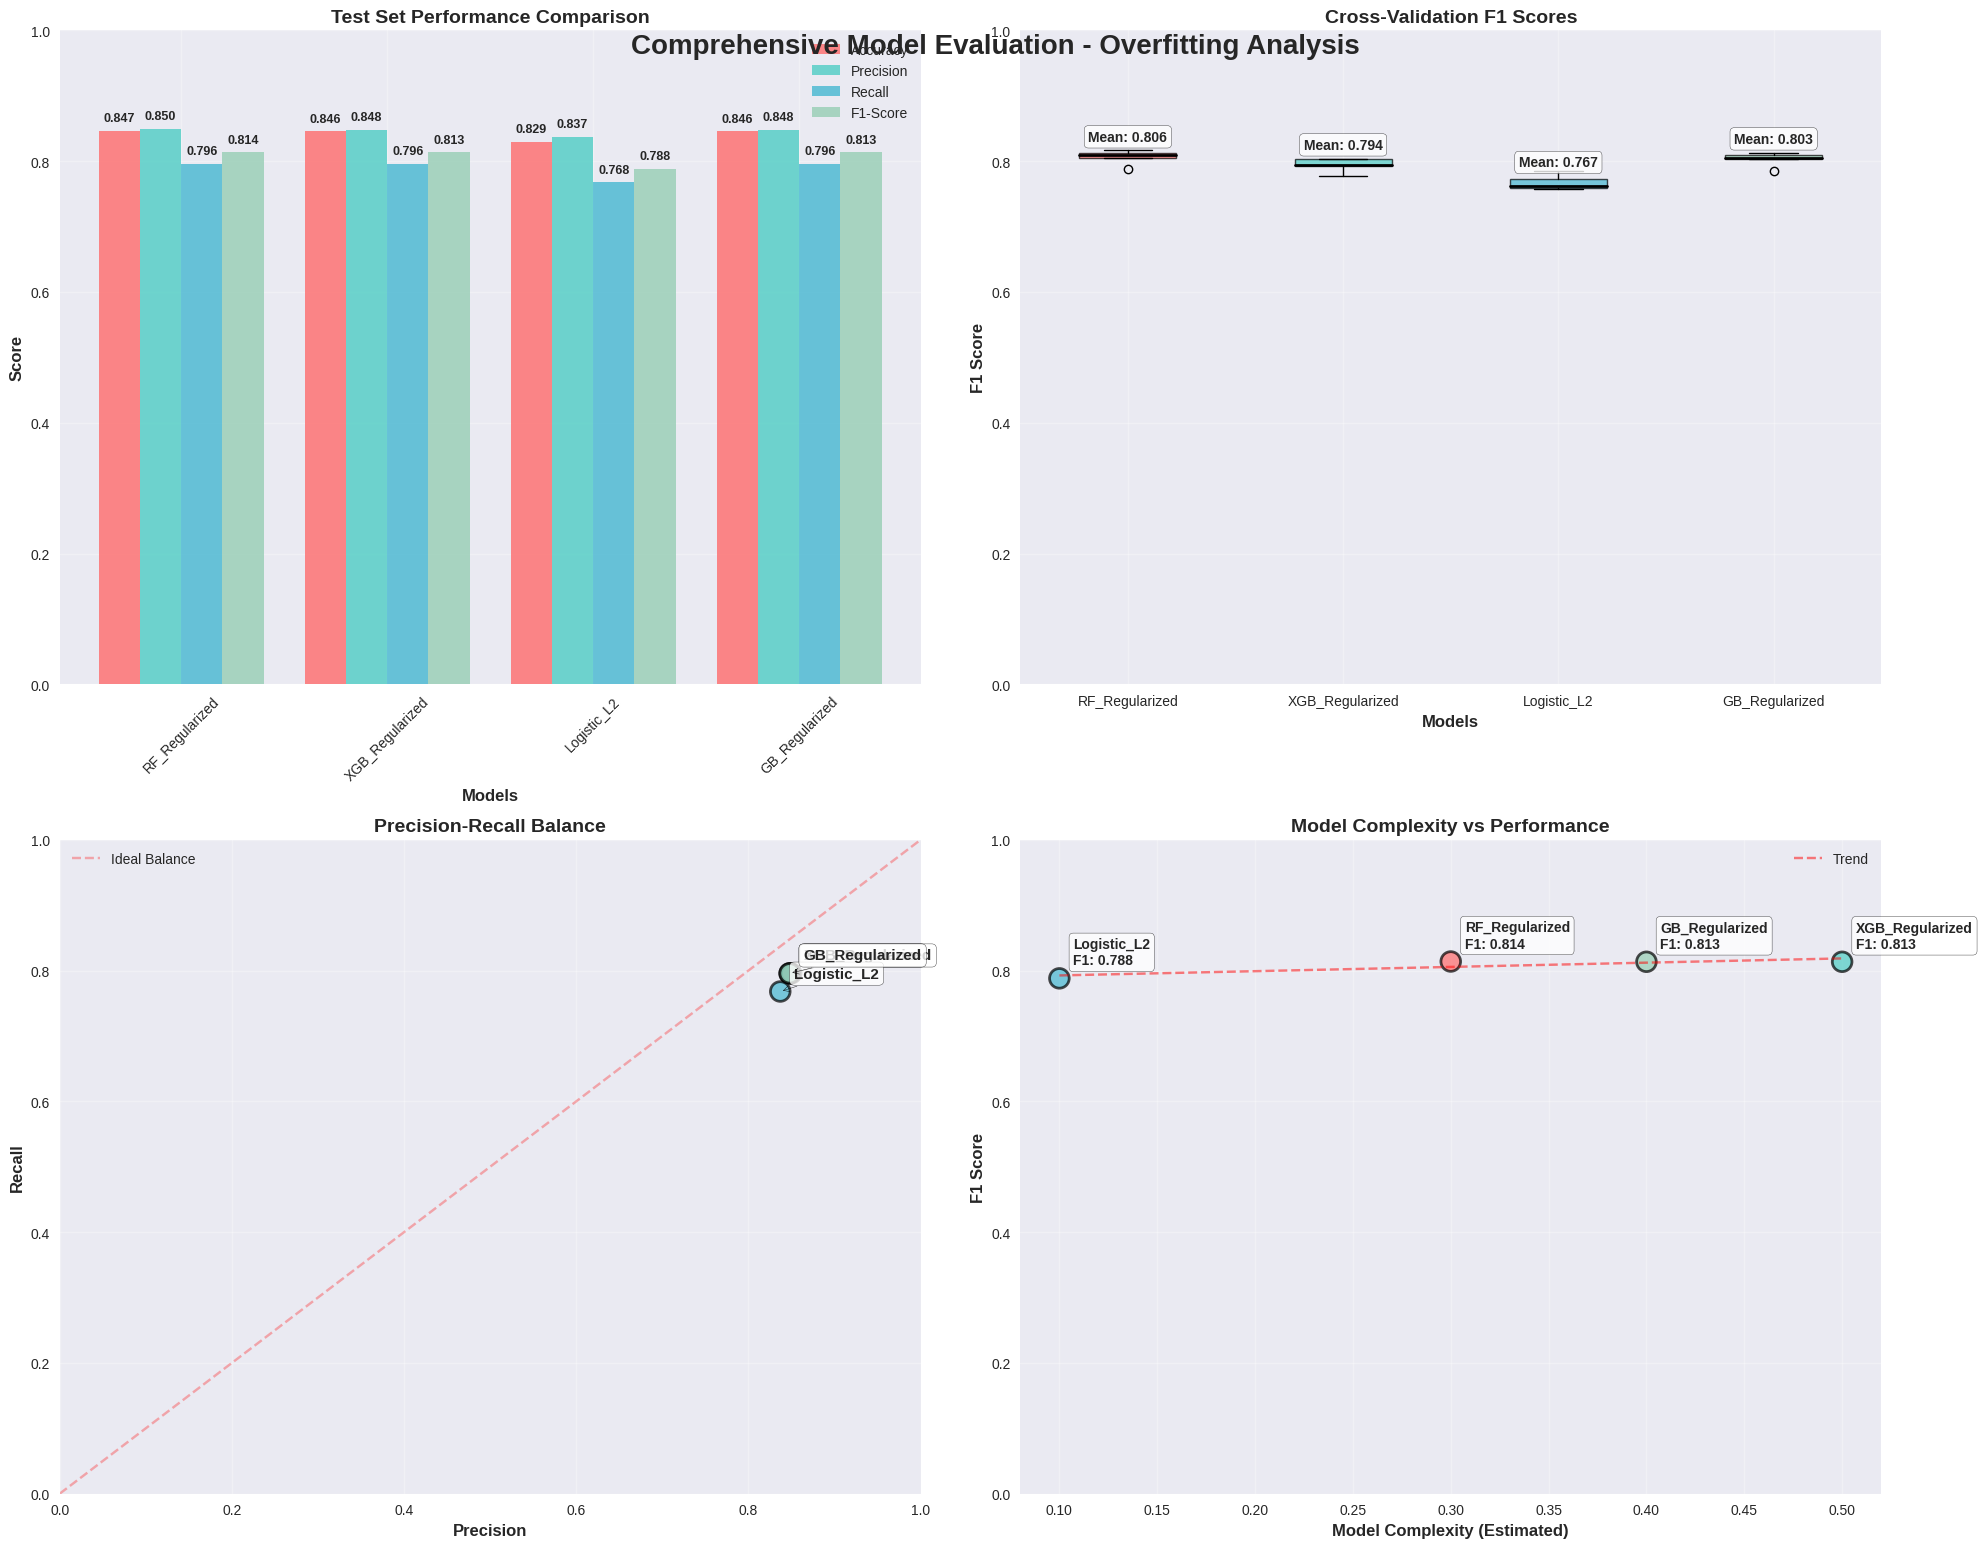


 MODEL COMPARISON SUMMARY

 RF_Regularized:
   Test F1: 0.8138
   CV Mean F1: 0.8064 (±0.0099)
   Precision: 0.8497
   Recall: 0.7957

 XGB_Regularized:
   Test F1: 0.8134
   CV Mean F1: 0.7941 (±0.0095)
   Precision: 0.8478
   Recall: 0.7957

 Logistic_L2:
   Test F1: 0.7881
   CV Mean F1: 0.7673 (±0.0103)
   Precision: 0.8369
   Recall: 0.7679

 GB_Regularized:
   Test F1: 0.8134
   CV Mean F1: 0.8033 (±0.0097)
   Precision: 0.8478
   Recall: 0.7957

 BEST MODEL: RF_Regularized (F1: 0.8138)


In [9]:

def plot_model_comparison(results, cv_results):
    """
    Create comprehensive model comparison visualizations using matplotlib
    """
    models = list(results.keys())
    
    plt.style.use('seaborn-v0_8')
    sns.set_palette("husl")
    
    fig, axes = plt.subplots(2, 2, figsize=(20, 16))
    fig.suptitle('Comprehensive Model Evaluation - Overfitting Analysis', 
                 fontsize=20, fontweight='bold', y=0.95)
    
    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFA726']
    
    metrics = ['accuracy', 'precision', 'recall', 'f1']
    metric_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
    
    x_pos = np.arange(len(models))
    bar_width = 0.2
    
    for i, metric in enumerate(metrics):
        values = [results[model][metric] for model in models]
        axes[0,0].bar(x_pos + i * bar_width, values, bar_width, 
                     label=metric_names[i], color=colors[i], alpha=0.8)
    
    axes[0,0].set_xlabel('Models', fontsize=12, fontweight='bold')
    axes[0,0].set_ylabel('Score', fontsize=12, fontweight='bold')
    axes[0,0].set_title('Test Set Performance Comparison', fontsize=14, fontweight='bold')
    axes[0,0].set_xticks(x_pos + bar_width * 1.5)
    axes[0,0].set_xticklabels(models, rotation=45)
    axes[0,0].legend()
    axes[0,0].grid(True, alpha=0.3)
    axes[0,0].set_ylim(0, 1)
    
    for i, metric in enumerate(metrics):
        values = [results[model][metric] for model in models]
        for j, v in enumerate(values):
            axes[0,0].text(j + i * bar_width, v + 0.01, f'{v:.3f}', 
                          ha='center', va='bottom', fontsize=9, fontweight='bold')
    
    box_data = [cv_results[model] for model in models]
    box_plot = axes[0,1].boxplot(box_data, labels=models, patch_artist=True)
    
    for patch, color in zip(box_plot['boxes'], colors[:len(models)]):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)
    
    for median in box_plot['medians']:
        median.set_color('black')
        median.set_linewidth(2)
    
    axes[0,1].set_xlabel('Models', fontsize=12, fontweight='bold')
    axes[0,1].set_ylabel('F1 Score', fontsize=12, fontweight='bold')
    axes[0,1].set_title('Cross-Validation F1 Scores', fontsize=14, fontweight='bold')
    axes[0,1].grid(True, alpha=0.3)
    axes[0,1].set_ylim(0, 1)
    
    for i, model in enumerate(models):
        mean_score = np.mean(cv_results[model])
        axes[0,1].text(i + 1, mean_score + 0.02, f'Mean: {mean_score:.3f}', 
                      ha='center', va='bottom', fontsize=10, fontweight='bold',
                      bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.8))
    
    precision_vals = [results[model]['precision'] for model in models]
    recall_vals = [results[model]['recall'] for model in models]
    
    scatter = axes[1,0].scatter(precision_vals, recall_vals, s=200, 
                               c=colors[:len(models)], alpha=0.7, edgecolors='black', linewidth=2)
    
    # Add model labels
    for i, model in enumerate(models):
        axes[1,0].annotate(model, (precision_vals[i], recall_vals[i]),
                          xytext=(10, 10), textcoords='offset points',
                          fontsize=11, fontweight='bold',
                          bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.8),
                          arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))
    
    axes[1,0].set_xlabel('Precision', fontsize=12, fontweight='bold')
    axes[1,0].set_ylabel('Recall', fontsize=12, fontweight='bold')
    axes[1,0].set_title('Precision-Recall Balance', fontsize=14, fontweight='bold')
    axes[1,0].grid(True, alpha=0.3)
    axes[1,0].set_xlim(0, 1)
    axes[1,0].set_ylim(0, 1)
    
    axes[1,0].plot([0, 1], [0, 1], 'r--', alpha=0.3, label='Ideal Balance')
    axes[1,0].legend()
    
    
    complexity_estimate = [0.3, 0.5, 0.1, 0.4]  
    
    f1_scores = [results[model]['f1'] for model in models]
    
    scatter = axes[1,1].scatter(complexity_estimate, f1_scores, s=200, 
                               c=colors[:len(models)], alpha=0.7, edgecolors='black', linewidth=2)
    
    # Add model labels and performance values
    for i, model in enumerate(models):
        axes[1,1].annotate(f"{model}\nF1: {f1_scores[i]:.3f}", 
                          (complexity_estimate[i], f1_scores[i]),
                          xytext=(10, 10), textcoords='offset points',
                          fontsize=10, fontweight='bold',
                          bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.8))
    
    axes[1,1].set_xlabel('Model Complexity (Estimated)', fontsize=12, fontweight='bold')
    axes[1,1].set_ylabel('F1 Score', fontsize=12, fontweight='bold')
    axes[1,1].set_title('Model Complexity vs Performance', fontsize=14, fontweight='bold')
    axes[1,1].grid(True, alpha=0.3)
    axes[1,1].set_ylim(0, 1)
    
    z = np.polyfit(complexity_estimate, f1_scores, 1)
    p = np.poly1d(z)
    x_trend = np.linspace(min(complexity_estimate), max(complexity_estimate), 100)
    axes[1,1].plot(x_trend, p(x_trend), "r--", alpha=0.5, label='Trend')
    axes[1,1].legend()
    
    plt.tight_layout()
    plt.show()
    
    print("\n" + "="*60)
    print(" MODEL COMPARISON SUMMARY")
    print("="*60)
    
    for model in models:
        print(f"\n {model}:")
        print(f"   Test F1: {results[model]['f1']:.4f}")
        print(f"   CV Mean F1: {np.mean(cv_results[model]):.4f} (±{np.std(cv_results[model]):.4f})")
        print(f"   Precision: {results[model]['precision']:.4f}")
        print(f"   Recall: {results[model]['recall']:.4f}")
    
    best_model = max(results, key=lambda x: results[x]['f1'])
    print(f"\n BEST MODEL: {best_model} (F1: {results[best_model]['f1']:.4f})")
    
    return fig

comparison_plot = plot_model_comparison(final_results, cv_results)

<h2 style="
  text-align:center;
  background: linear-gradient(135deg, #1e1e2e 0%, #3a0ca3 100%);
  color: #f8f9fa;
  padding: 14px 20px;
  border-radius: 10px;
  font-family: 'Segoe UI', sans-serif;
  font-weight: 700;
  letter-spacing: 1px;
  box-shadow: 0px 4px 12px rgba(0,0,0,0.35);
">
Learning Curves Analysis

</h2>

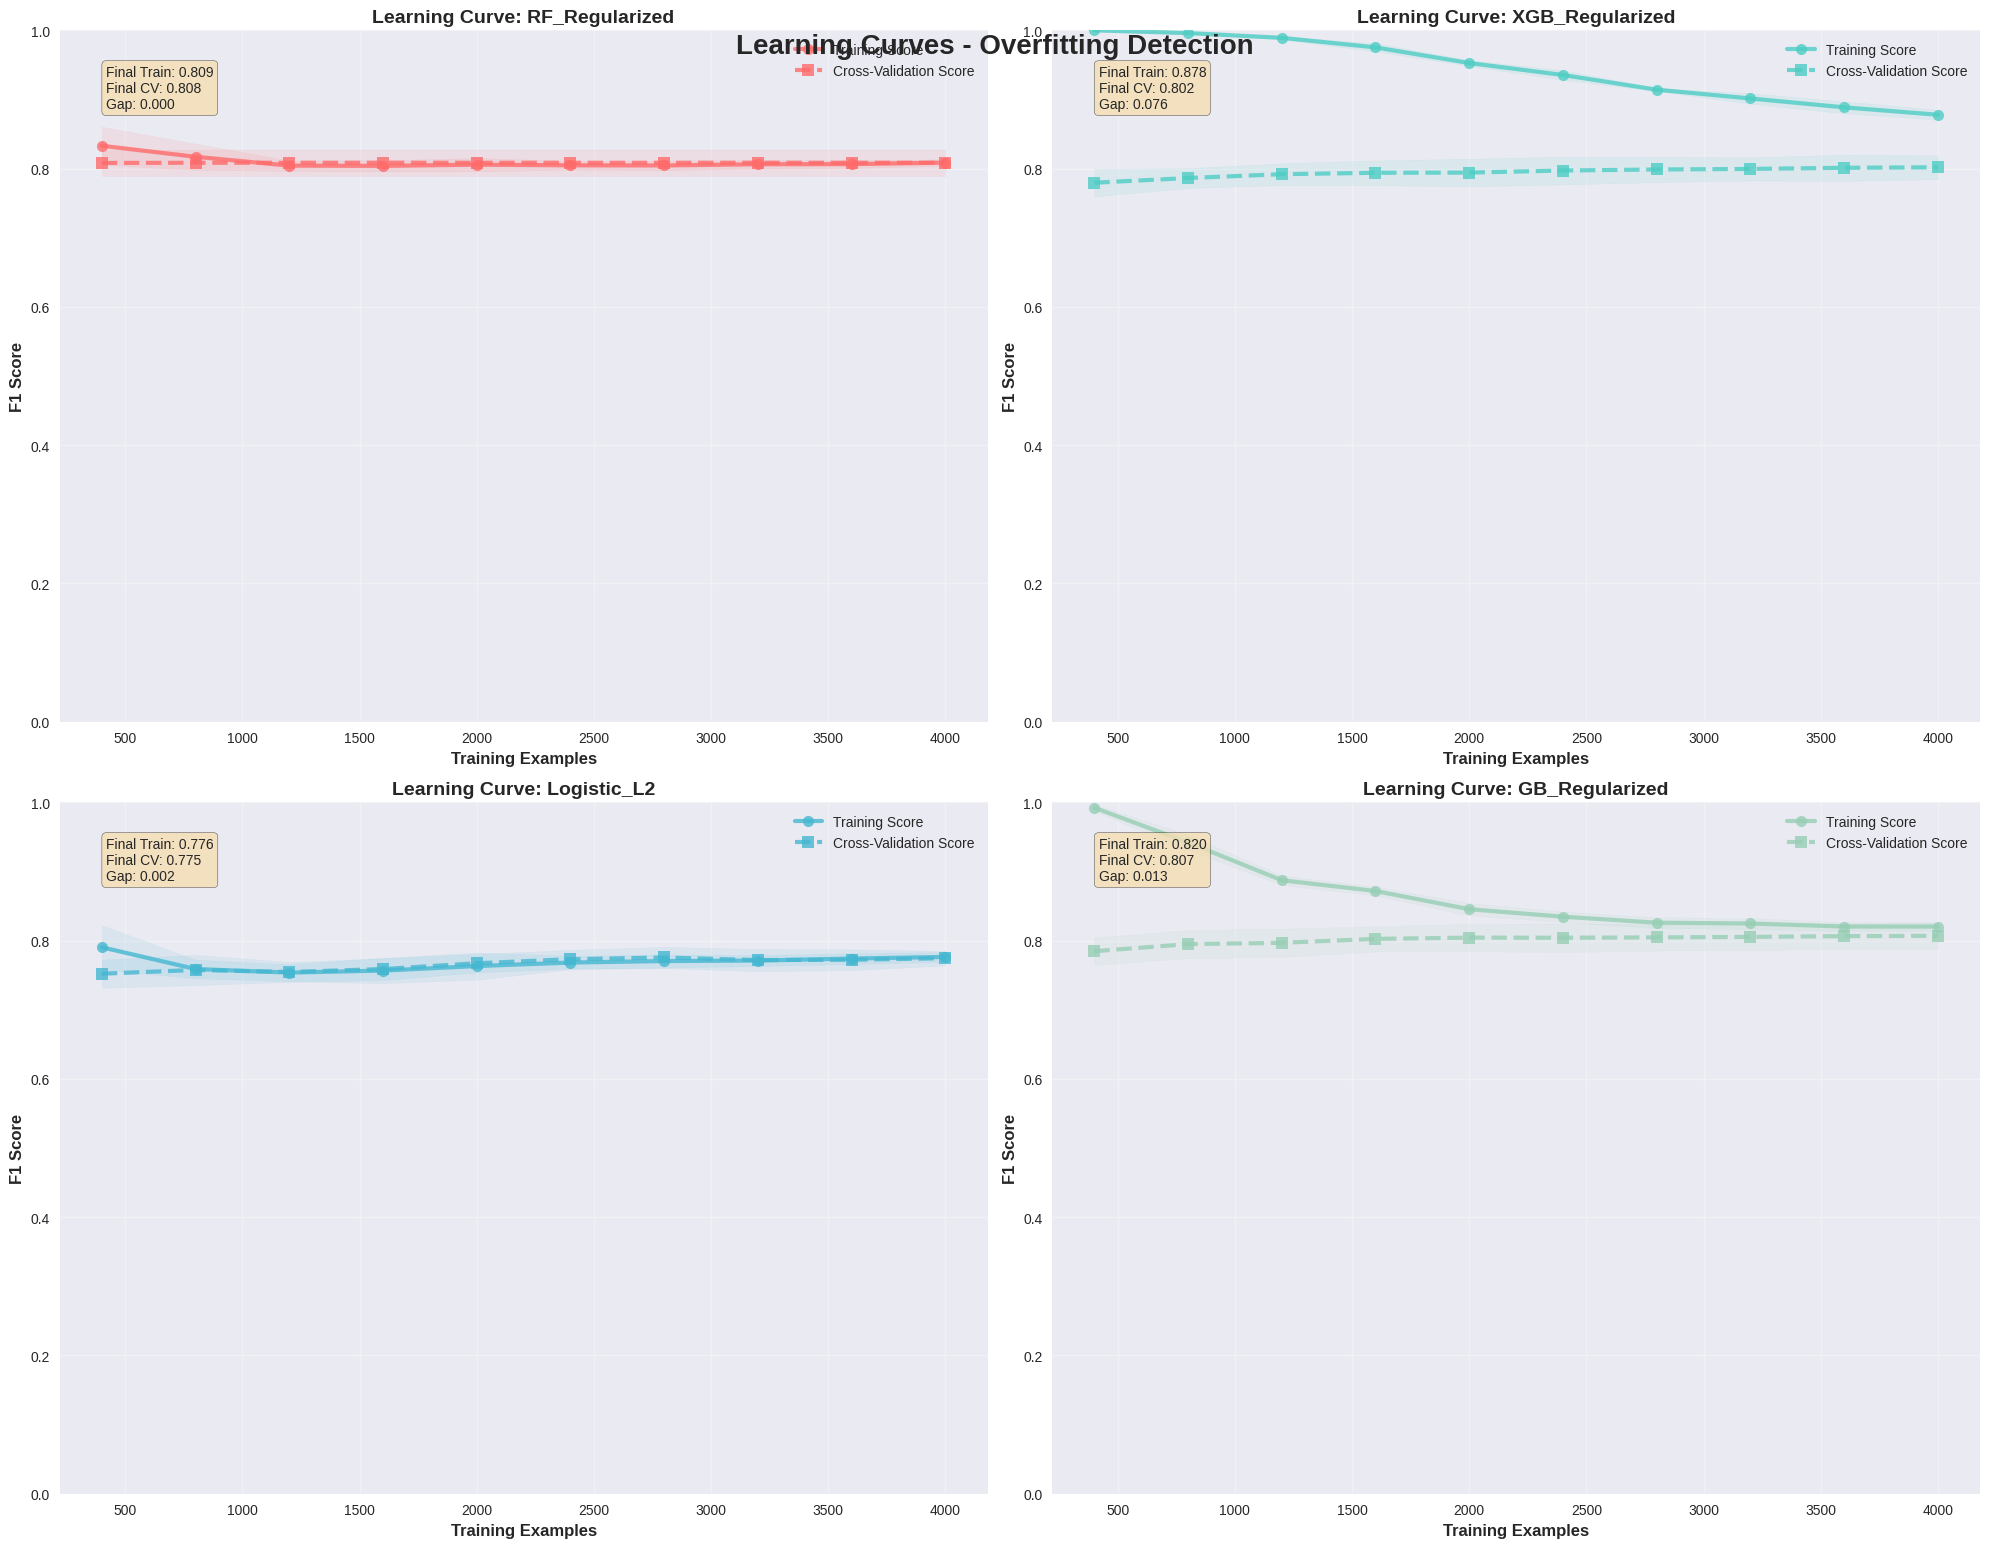

Model,Final Train Score,Final CV Score,Performance Gap,Avg CV Score,Status,Recommendation
RF_Regularized,0.809,0.808,0.000 Low ← Gap → High,0.808,🟢 Good Fit,Model is well balanced
XGB_Regularized,0.878,0.802,0.076 Low ← Gap → High,0.794,🟡 Moderate,"Monitor performance, consider adjustments"
Logistic_L2,0.776,0.775,0.002 Low ← Gap → High,0.766,🟢 Good Fit,Model is well balanced
GB_Regularized,0.820,0.807,0.013 Low ← Gap → High,0.801,🟢 Good Fit,Model is well balanced


In [10]:
from sklearn.model_selection import learning_curve
from IPython.display import display, HTML
import pandas as pd

def plot_learning_curves_html(models, X, y):
    """
    Plot learning curves and display comprehensive analysis in HTML table
    """
    fig, axes = plt.subplots(2, 2, figsize=(20, 16))
    fig.suptitle('Learning Curves - Overfitting Detection', 
                 fontsize=20, fontweight='bold', y=0.95)
    
    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']
    summary_data = []
    
    for idx, (name, model) in enumerate(list(models.items())[:4]):
        row = idx // 2
        col = idx % 2
        
        train_sizes, train_scores, test_scores = learning_curve(
            model, X, y, cv=5, n_jobs=-1,
            train_sizes=np.linspace(0.1, 1.0, 10),
            scoring='f1_macro', random_state=42
        )
        
        train_mean = np.mean(train_scores, axis=1)
        train_std = np.std(train_scores, axis=1)
        test_mean = np.mean(test_scores, axis=1)
        test_std = np.std(test_scores, axis=1)
        
        final_train = train_mean[-1]
        final_test = test_mean[-1]
        gap = final_train - final_test
        avg_test = np.mean(test_mean)
        
        if gap > 0.1:
            status = "🔴 Overfitting"
            status_class = "status-overfitting"
            recommendation = "Increase regularization, reduce complexity"
        elif gap < 0.02:
            status = "🟢 Good Fit"
            status_class = "status-good"
            recommendation = "Model is well balanced"
        else:
            status = "🟡 Moderate"
            status_class = "status-moderate"
            recommendation = "Monitor performance, consider adjustments"
        
        # Store data for HTML table
        summary_data.append({
            'model': name,
            'final_train': final_train,
            'final_test': final_test,
            'gap': gap,
            'avg_test': avg_test,
            'status': status,
            'status_class': status_class,
            'recommendation': recommendation
        })
        
        axes[row, col].plot(train_sizes, train_mean, 'o-', color=colors[idx], 
                           linewidth=3, markersize=8, label='Training Score', alpha=0.8)
        axes[row, col].plot(train_sizes, test_mean, 's-', color=colors[idx], 
                           linewidth=3, markersize=8, label='Cross-Validation Score', 
                           alpha=0.8, linestyle='--')
        
        axes[row, col].fill_between(train_sizes, train_mean - train_std, 
                                   train_mean + train_std, alpha=0.1, color=colors[idx])
        axes[row, col].fill_between(train_sizes, test_mean - test_std, 
                                   test_mean + test_std, alpha=0.1, color=colors[idx])
        
        axes[row, col].set_title(f'Learning Curve: {name}', fontsize=14, fontweight='bold')
        axes[row, col].set_xlabel('Training Examples', fontsize=12, fontweight='bold')
        axes[row, col].set_ylabel('F1 Score', fontsize=12, fontweight='bold')
        axes[row, col].legend(loc='best')
        axes[row, col].grid(True, alpha=0.3)
        axes[row, col].set_ylim(0, 1)
        
        # Add performance metrics
        textstr = f'Final Train: {final_train:.3f}\nFinal CV: {final_test:.3f}\nGap: {gap:.3f}'
        props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)
        axes[row, col].text(0.05, 0.95, textstr, transform=axes[row, col].transAxes, 
                           fontsize=10, verticalalignment='top', bbox=props)
    
    plt.tight_layout()
    plt.show()
    
    html_output = """
    <style>
    .learning-curve-table {
        width: 100%;
        border-collapse: collapse;
        margin: 25px 0;
        font-family: 'Segoe UI', Arial, sans-serif;
        box-shadow: 0 6px 20px rgba(0,0,0,0.1);
        border-radius: 15px;
        overflow: hidden;
    }
    .learning-curve-table th {
        background: linear-gradient(135deg, #667eea 0%, #764ba2 100%);
        color: white;
        padding: 20px;
        text-align: center;
        font-size: 16px;
        font-weight: bold;
        text-transform: uppercase;
        letter-spacing: 1px;
    }
    .learning-curve-table td {
        padding: 18px;
        text-align: center;
        border-bottom: 1px solid #e0e0e0;
        font-size: 14px;
        transition: all 0.3s ease;
    }
    .learning-curve-table tr {
        transition: all 0.3s ease;
    }
    .learning-curve-table tr:hover {
        background-color: #f8f9fa;
        transform: translateY(-2px);
        box-shadow: 0 4px 12px rgba(0,0,0,0.1);
    }
    .status-overfitting {
        background: linear-gradient(135deg, #ff6b6b, #c23616) !important;
        color: white;
        font-weight: bold;
        border-radius: 25px;
        padding: 10px 20px;
        box-shadow: 0 4px 8px rgba(255,107,107,0.3);
    }
    .status-good {
        background: linear-gradient(135deg, #66bb6a, #388e3c) !important;
        color: white;
        font-weight: bold;
        border-radius: 25px;
        padding: 10px 20px;
        box-shadow: 0 4px 8px rgba(102,187,106,0.3);
    }
    .status-moderate {
        background: linear-gradient(135deg, #ffa726, #f57c00) !important;
        color: white;
        font-weight: bold;
        border-radius: 25px;
        padding: 10px 20px;
        box-shadow: 0 4px 8px rgba(255,167,38,0.3);
    }
    .score-cell {
        font-weight: bold;
        font-size: 15px;
        border-radius: 20px;
        padding: 8px 12px;
        margin: 2px;
    }
    .score-high {
        background-color: #e8f5e8;
        color: #2e7d32;
        border: 2px solid #c8e6c9;
    }
    .score-medium {
        background-color: #fff3e0;
        color: #ef6c00;
        border: 2px solid #ffe0b2;
    }
    .score-low {
        background-color: #ffebee;
        color: #c62828;
        border: 2px solid #ffcdd2;
    }
    .header-learning {
        background: linear-gradient(135deg, #ff6b6b 0%, #ee5a24 100%);
        color: white;
        padding: 25px;
        border-radius: 15px;
        text-align: center;
        margin: 20px 0;
        font-size: 28px;
        font-weight: bold;
        box-shadow: 0 6px 20px rgba(255,107,107,0.3);
    }
    .interpretation-guide {
        background: linear-gradient(135deg, #4ecdc4 0%, #44a08d 100%);
        color: white;
        padding: 20px;
        border-radius: 10px;
        margin: 20px 0;
    }
    .gap-indicator {
        height: 10px;
        background: linear-gradient(90deg, #4caf50, #ffeb3b, #f44336);
        border-radius: 5px;
        margin: 8px 0;
        position: relative;
    }
    .gap-marker {
        position: absolute;
        top: -3px;
        width: 6px;
        height: 16px;
        background: #2c3e50;
        transform: translateX(-50%);
    }
    .recommendation-cell {
        text-align: left !important;
        font-size: 13px;
        line-height: 1.4;
    }
    </style>
    """
    
    html_output += """
    <div class="header-learning">
        📊 LEARNING CURVES ANALYSIS - OVERFITTING DETECTION
    </div>
    """
    
    html_output += """
    <div class="interpretation-guide">
        <h3 style="margin:0 0 15px 0; color:white;">🎯 INTERPRETATION GUIDE</h3>
        <div style="display: grid; grid-template-columns: repeat(3, 1fr); gap: 15px;">
            <div style="background: rgba(255,255,255,0.2); padding: 15px; border-radius: 8px;">
                <h4 style="color:white; margin:0 0 10px 0;">🔴 OVERFITTING</h4>
                <ul style="color:white; margin:0; padding-left: 20px;">
                    <li>Gap > 0.1</li>
                    <li>High variance</li>
                    <li>Poor generalization</li>
                </ul>
            </div>
            <div style="background: rgba(255,255,255,0.2); padding: 15px; border-radius: 8px;">
                <h4 style="color:white; margin:0 0 10px 0;">🟢 GOOD FIT</h4>
                <ul style="color:white; margin:0; padding-left: 20px;">
                    <li>Gap < 0.02</li>
                    <li>Well balanced</li>
                    <li>Good generalization</li>
                </ul>
            </div>
            <div style="background: rgba(255,255,255,0.2); padding: 15px; border-radius: 8px;">
                <h4 style="color:white; margin:0 0 10px 0;">🟡 MODERATE</h4>
                <ul style="color:white; margin:0; padding-left: 20px;">
                    <li>0.02 ≤ Gap ≤ 0.1</li>
                    <li>Acceptable balance</li>
                    <li>Monitor performance</li>
                </ul>
            </div>
        </div>
    </div>
    """
    
    html_output += """
    <table class="learning-curve-table">
        <thead>
            <tr>
                <th>Model</th>
                <th>Final Train Score</th>
                <th>Final CV Score</th>
                <th>Performance Gap</th>
                <th>Avg CV Score</th>
                <th>Status</th>
                <th>Recommendation</th>
            </tr>
        </thead>
        <tbody>
    """
    
    for data in summary_data:
        train_score_class = "score-high" if data['final_train'] > 0.8 else "score-medium" if data['final_train'] > 0.6 else "score-low"
        test_score_class = "score-high" if data['final_test'] > 0.8 else "score-medium" if data['final_test'] > 0.6 else "score-low"
        gap_class = "score-low" if data['gap'] > 0.1 else "score-high" if data['gap'] < 0.02 else "score-medium"
        
        gap_position = min(100, (data['gap'] / 0.2) * 100)
        
        html_output += f"""
        <tr>
            <td style="font-weight: bold; color: #2c3e50; font-size: 15px;">{data['model']}</td>
            <td><span class="score-cell {train_score_class}">{data['final_train']:.3f}</span></td>
            <td><span class="score-cell {test_score_class}">{data['final_test']:.3f}</span></td>
            <td>
                <span class="score-cell {gap_class}">{data['gap']:.3f}</span>
                <div class="gap-indicator">
                    <div class="gap-marker" style="left: {gap_position}%;"></div>
                </div>
                <div style="font-size: 11px; color: #7f8c8d; margin-top: 5px;">
                    Low ← Gap → High
                </div>
            </td>
            <td><span class="score-cell {test_score_class}">{data['avg_test']:.3f}</span></td>
            <td><span class="{data['status_class']}">{data['status']}</span></td>
            <td class="recommendation-cell">{data['recommendation']}</td>
        </tr>
        """
    
    html_output += """
        </tbody>
    </table>
    """
    
    # Summary statistics
    total_models = len(summary_data)
    good_fit_count = len([d for d in summary_data if d['status_class'] == 'status-good'])
    overfitting_count = len([d for d in summary_data if d['status_class'] == 'status-overfitting'])
    avg_gap = np.mean([d['gap'] for d in summary_data])
    
    html_output += f"""
    <div style="background: white; padding: 20px; border-radius: 10px; margin: 20px 0; box-shadow: 0 4px 10px rgba(0,0,0,0.1);">
        <h3 style="color: #2c3e50; margin-bottom: 15px;">📈 SUMMARY STATISTICS</h3>
        <div style="display: grid; grid-template-columns: repeat(4, 1fr); gap: 15px; text-align: center;">
            <div style="padding: 15px; background: #f8f9fa; border-radius: 8px;">
                <div style="font-size: 24px; font-weight: bold; color: #2c3e50;">{total_models}</div>
                <div style="color: #7f8c8d;">Total Models</div>
            </div>
            <div style="padding: 15px; background: #e8f5e8; border-radius: 8px;">
                <div style="font-size: 24px; font-weight: bold; color: #2e7d32;">{good_fit_count}</div>
                <div style="color: #7f8c8d;">Good Fit Models</div>
            </div>
            <div style="padding: 15px; background: #ffebee; border-radius: 8px;">
                <div style="font-size: 24px; font-weight: bold; color: #c62828;">{overfitting_count}</div>
                <div style="color: #7f8c8d;">Overfitting Models</div>
            </div>
            <div style="padding: 15px; background: #fff3e0; border-radius: 8px;">
                <div style="font-size: 24px; font-weight: bold; color: #ef6c00;">{avg_gap:.3f}</div>
                <div style="color: #7f8c8d;">Average Gap</div>
            </div>
        </div>
    </div>
    """
    
    # Display the HTML
    display(HTML(html_output))
    
    return fig, summary_data

# Generate learning curves with HTML analysis
learning_curve_fig, analysis_data = plot_learning_curves_html(regularized_models, X_improved, y_improved)

<h2 style="
  text-align:center;
  background: linear-gradient(135deg, #1e1e2e 0%, #3a0ca3 100%);
  color: #f8f9fa;
  padding: 14px 20px;
  border-radius: 10px;
  font-family: 'Segoe UI', sans-serif;
  font-weight: 700;
  letter-spacing: 1px;
  box-shadow: 0px 4px 12px rgba(0,0,0,0.35);
">
Feature Importance Analysis

</h2>

In [11]:
def analyze_feature_importance(final_results, feature_names):
    """
    Analyze and visualize feature importance across models
    """
    best_model_name = max(final_results, key=lambda x: final_results[x]['f1'])
    best_model = final_results[best_model_name]['model']
    
    print(f" Best Model: {best_model_name}")
    print(f" Best F1-Score: {final_results[best_model_name]['f1']:.4f}")
    
    if hasattr(best_model, 'feature_importances_'):
        importance_df = pd.DataFrame({
            'feature': feature_names,
            'importance': best_model.feature_importances_
        }).sort_values('importance', ascending=True)
        
        fig = go.Figure(go.Bar(
            x=importance_df['importance'],
            y=importance_df['feature'],
            orientation='h',
            marker_color='#96CEB4'
        ))
        
        fig.update_layout(
            title=f'Feature Importance - {best_model_name}',
            xaxis_title='Importance Score',
            yaxis_title='Features',
            template='plotly_white',
            height=500
        )
        fig.show()
        
        print("\n Top 10 Most Important Features:")
        for idx, row in importance_df.tail(10).iterrows():
            print(f"  {row['feature']}: {row['importance']:.4f}")
    
    return best_model_name, best_model

best_model_name, best_model = analyze_feature_importance(
    final_results, X_improved.columns.tolist()
)

 Best Model: RF_Regularized
 Best F1-Score: 0.8138



 Top 10 Most Important Features:
  deaths: 0.0088
  age_group_encoded: 0.0098
  month: 0.0154
  hospitalizations: 0.0173
  population_density: 0.0277
  travel_index: 0.0317
  temperature: 0.0349
  humidity: 0.0358
  disease_encoded: 0.0780
  cases: 0.7333


<h2 style="
  text-align:center;
  background: linear-gradient(135deg, #1e1e2e 0%, #3a0ca3 100%);
  color: #f8f9fa;
  padding: 14px 20px;
  border-radius: 10px;
  font-family: 'Segoe UI', sans-serif;
  font-weight: 700;
  letter-spacing: 1px;
  box-shadow: 0px 4px 12px rgba(0,0,0,0.35);
">
 Create Realistic Predictions

</h2>

In [12]:

from sklearn.preprocessing import LabelEncoder

# Function: Create Realistic Predictions
def create_realistic_predictions(best_model, raw_data, feature_names):
    """
    Create realistic predictions with confidence intervals
    from raw_data (original dataframe) by encoding categorical
    features and extracting month.
    """
    data = raw_data.copy()
    
   
    if 'date' in data.columns:
        data['month'] = pd.to_datetime(data['date']).dt.month

    for col in ['disease', 'region', 'age_group']:
        if col in data.columns:
            le = LabelEncoder()
            data[col + '_encoded'] = le.fit_transform(data[col])
    
    
    missing_cols = [c for c in feature_names if c not in data.columns]
    if missing_cols:
        raise ValueError(f"Missing columns in data: {missing_cols}")
    
    X_final = data[feature_names]
    
    predictions = best_model.predict(X_final)
    probabilities = best_model.predict_proba(X_final)[:, 1]
    
    data['predicted_risk'] = predictions
    data['risk_probability'] = probabilities
    
    data['confidence_level'] = pd.cut(
        np.max(best_model.predict_proba(X_final), axis=1),
        bins=[0, 0.6, 0.8, 1],
        labels=['Low', 'Medium', 'High']
    )
    
    data['final_risk_level'] = np.where(
        (data['risk_probability'] > 0.7) & (data['confidence_level'] != 'Low'),
        'High Risk',
        np.where(data['risk_probability'] > 0.4, 'Medium Risk', 'Low Risk')
    )
    
    print("🎯 Realistic Risk Distribution:")
    risk_counts = data['final_risk_level'].value_counts()
    for risk, count in risk_counts.items():
        percentage = (count / len(data)) * 100
        print(f"  {risk}: {count} ({percentage:.1f}%)")
    
    return data


final_realistic_predictions = create_realistic_predictions(
    best_model, virus_data, X_improved.columns.tolist()
)

🎯 Realistic Risk Distribution:
  Low Risk: 3757 (75.1%)
  High Risk: 1185 (23.7%)
  Medium Risk: 58 (1.2%)


<h2 style="
  text-align:center;
  background: linear-gradient(135deg, #1e1e2e 0%, #3a0ca3 100%);
  color: #f8f9fa;
  padding: 14px 20px;
  border-radius: 10px;
  font-family: 'Segoe UI', sans-serif;
  font-weight: 700;
  letter-spacing: 1px;
  box-shadow: 0px 4px 12px rgba(0,0,0,0.35);
">
Predict Disease Outbreaks 

</h2>

In [13]:


def predict_disease_outbreaks(best_model, raw_data, feature_names):
    """
    Predict which diseases are likely to outbreak with probabilities
    from raw_data by encoding categorical features and extracting month.
    """
    data = raw_data.copy()
    
    
    if 'date' in data.columns:
        data['month'] = pd.to_datetime(data['date']).dt.month

    for col in ['disease', 'region', 'age_group']:
        if col in data.columns:
            le = LabelEncoder()
            data[col + '_encoded'] = le.fit_transform(data[col])
    
    recent_data = data.sort_values('date').tail(1000)
    
    missing_cols = [c for c in feature_names if c not in recent_data.columns]
    if missing_cols:
        raise ValueError(f"Missing columns in data: {missing_cols}")
    
    X_recent = recent_data[feature_names]
    
    outbreak_predictions = best_model.predict(X_recent)
    outbreak_probabilities = best_model.predict_proba(X_recent)[:, 1]
    
    results_df = recent_data.copy()
    results_df['outbreak_prediction'] = outbreak_predictions
    results_df['outbreak_probability'] = outbreak_probabilities
    
    return results_df


outbreak_predictions = predict_disease_outbreaks(
    best_model, virus_data, X_improved.columns.tolist()
)

<h2 style="
  text-align:center;
  background: linear-gradient(135deg, #1e1e2e 0%, #3a0ca3 100%);
  color: #f8f9fa;
  padding: 14px 20px;
  border-radius: 10px;
  font-family: 'Segoe UI', sans-serif;
  font-weight: 700;
  letter-spacing: 1px;
  box-shadow: 0px 4px 12px rgba(0,0,0,0.35);
">
 Disease Risk Analysis 

</h2>

In [14]:
from IPython.display import display, HTML

def analyze_disease_risks_html(predictions_df):
    """
    Analyze and rank diseases by outbreak risk probability with HTML display
    """
    required_cols = ['disease', 'outbreak_probability', 'outbreak_prediction', 'cases']
    missing_cols = [c for c in required_cols if c not in predictions_df.columns]
    if missing_cols:
        raise ValueError(f"Missing columns in predictions_df: {missing_cols}")
    
    disease_analysis = predictions_df.groupby('disease').agg({
        'outbreak_probability': ['mean', 'max', 'count'],
        'outbreak_prediction': 'sum',
        'cases': 'mean'
    }).round(4)
    
    disease_analysis.columns = ['avg_risk_prob', 'max_risk_prob', 'record_count', 
                               'high_risk_count', 'avg_cases']
    
    disease_analysis['high_risk_percentage'] = (
        disease_analysis['high_risk_count'] / disease_analysis['record_count'] * 100
    ).round(2)
    
    disease_analysis = disease_analysis.sort_values('avg_risk_prob', ascending=False)
    
    def get_risk_category(avg_risk):
        if avg_risk >= 0.7:
            return ' Very High Risk'
        elif avg_risk >= 0.5:
            return ' High Risk'
        elif avg_risk >= 0.3:
            return ' Medium Risk'
        else:
            return ' Low Risk'
    
    disease_analysis['risk_category'] = disease_analysis['avg_risk_prob'].apply(get_risk_category)
    
    html_output = """
    <style>
    .disease-risk-table {
        width: 100%;
        border-collapse: collapse;
        margin: 20px 0;
        font-family: 'Segoe UI', Arial, sans-serif;
        box-shadow: 0 4px 15px rgba(0,0,0,0.1);
        border-radius: 10px;
        overflow: hidden;
    }
    .disease-risk-table th {
        background: linear-gradient(135deg, #667eea 0%, #764ba2 100%);
        color: white;
        padding: 18px;
        text-align: center;
        font-size: 16px;
        font-weight: bold;
        text-transform: uppercase;
        letter-spacing: 1px;
    }
    .disease-risk-table td {
        padding: 15px;
        text-align: center;
        border-bottom: 1px solid #e0e0e0;
        font-size: 14px;
        transition: all 0.3s ease;
    }
    .disease-risk-table tr {
        transition: all 0.3s ease;
    }
    .disease-risk-table tr:hover {
        background-color: #f8f9fa;
        transform: translateY(-2px);
        box-shadow: 0 4px 8px rgba(0,0,0,0.1);
    }
    .risk-very-high {
        background: linear-gradient(135deg, #ff6b6b, #ee5a24) !important;
        color: white;
        font-weight: bold;
        border-radius: 25px;
        padding: 8px 16px;
        box-shadow: 0 2px 4px rgba(255,107,107,0.3);
    }
    .risk-high {
        background: linear-gradient(135deg, #ffa726, #f57c00) !important;
        color: white;
        font-weight: bold;
        border-radius: 25px;
        padding: 8px 16px;
        box-shadow: 0 2px 4px rgba(255,167,38,0.3);
    }
    .risk-medium {
        background: linear-gradient(135deg, #ffd54f, #ffb300) !important;
        color: white;
        font-weight: bold;
        border-radius: 25px;
        padding: 8px 16px;
        box-shadow: 0 2px 4px rgba(255,213,79,0.3);
    }
    .risk-low {
        background: linear-gradient(135deg, #66bb6a, #388e3c) !important;
        color: white;
        font-weight: bold;
        border-radius: 25px;
        padding: 8px 16px;
        box-shadow: 0 2px 4px rgba(102,187,106,0.3);
    }
    .probability-cell {
        font-weight: bold;
        font-size: 15px;
        border-radius: 20px;
        padding: 8px 12px;
    }
    .probability-high {
        background-color: #ffebee;
        color: #c62828;
        border: 2px solid #ffcdd2;
    }
    .probability-medium {
        background-color: #fff3e0;
        color: #ef6c00;
        border: 2px solid #ffe0b2;
    }
    .probability-low {
        background-color: #e8f5e8;
        color: #2e7d32;
        border: 2px solid #c8e6c9;
    }
    .header-disease {
        background: linear-gradient(135deg, #ff6b6b 0%, #ee5a24 100%);
        color: white;
        padding: 25px;
        border-radius: 15px;
        text-align: center;
        margin: 20px 0;
        font-size: 28px;
        font-weight: bold;
        box-shadow: 0 6px 20px rgba(255,107,107,0.3);
    }
    .stats-summary {
        display: flex;
        justify-content: space-around;
        margin: 20px 0;
        text-align: center;
    }
    .stat-box {
        background: white;
        padding: 20px;
        border-radius: 10px;
        box-shadow: 0 4px 10px rgba(0,0,0,0.1);
        flex: 1;
        margin: 0 10px;
    }
    .stat-value {
        font-size: 24px;
        font-weight: bold;
        color: #2c3e50;
        margin: 10px 0;
    }
    .stat-label {
        color: #7f8c8d;
        font-size: 14px;
        text-transform: uppercase;
        letter-spacing: 1px;
    }
    .risk-meter {
        height: 8px;
        background: linear-gradient(90deg, #4caf50, #ffeb3b, #f44336);
        border-radius: 4px;
        margin: 10px 0;
        position: relative;
    }
    .risk-indicator {
        position: absolute;
        top: -5px;
        width: 4px;
        height: 18px;
        background: #2c3e50;
        transform: translateX(-50%);
    }
    </style>
    """
    
    html_output += """
    <div class="header-disease">
        🦠 DISEASE OUTBREAK RISK PREDICTION ANALYSIS
    </div>
    """
    
    total_diseases = len(disease_analysis)
    very_high_count = len(disease_analysis[disease_analysis['risk_category'] == '🔥 Very High Risk'])
    high_count = len(disease_analysis[disease_analysis['risk_category'] == '⚠ High Risk'])
    avg_risk_overall = disease_analysis['avg_risk_prob'].mean()
    
    html_output += f"""
    <div class="stats-summary">
        <div class="stat-box">
            <div class="stat-label">Total Diseases</div>
            <div class="stat-value">{total_diseases}</div>
        </div>
        <div class="stat-box">
            <div class="stat-label">Very High Risk</div>
            <div class="stat-value" style="color:#c62828;">{very_high_count}</div>
        </div>
        <div class="stat-box">
            <div class="stat-label">High Risk</div>
            <div class="stat-value" style="color:#ef6c00;">{high_count}</div>
        </div>
        <div class="stat-box">
            <div class="stat-label">Avg Risk</div>
            <div class="stat-value" style="color:#2c3e50;">{avg_risk_overall*100:.1f}%</div>
        </div>
    </div>
    """
    
    html_output += """
    <div style="background: white; padding: 20px; border-radius: 10px; margin: 20px 0; box-shadow: 0 4px 10px rgba(0,0,0,0.1);">
        <div style="display: flex; justify-content: space-between; margin-bottom: 10px;">
            <span style="color: #4caf50; font-weight: bold;">Low Risk (0-30%)</span>
            <span style="color: #ff9800; font-weight: bold;">Medium Risk (30-50%)</span>
            <span style="color: #f44336; font-weight: bold;">High Risk (50-70%)</span>
            <span style="color: #c62828; font-weight: bold;">Very High Risk (70-100%)</span>
        </div>
        <div class="risk-meter">
            <div class="risk-indicator" style="left: 30%;"></div>
            <div class="risk-indicator" style="left: 50%;"></div>
            <div class="risk-indicator" style="left: 70%;"></div>
        </div>
    </div>
    """
    
    html_output += """
    <table class="disease-risk-table">
        <thead>
            <tr>
                <th>Rank</th>
                <th>Disease</th>
                <th>Avg Risk %</th>
                <th>Max Risk %</th>
                <th>High Risk %</th>
                <th>Avg Cases</th>
                <th>Records</th>
                <th>Risk Category</th>
            </tr>
        </thead>
        <tbody>
    """
    
    for i, (disease, row) in enumerate(disease_analysis.iterrows(), 1):
        if row['avg_risk_prob'] > 0.7:
            prob_class = "probability-high"
        elif row['avg_risk_prob'] > 0.5:
            prob_class = "probability-medium"
        else:
            prob_class = "probability-low"
        
        if row['risk_category'] == '🔥 Very High Risk':
            risk_class = "risk-very-high"
        elif row['risk_category'] == '⚠ High Risk':
            risk_class = "risk-high"
        elif row['risk_category'] == '🔶 Medium Risk':
            risk_class = "risk-medium"
        else:
            risk_class = "risk-low"
        
        html_output += f"""
        <tr>
            <td style="font-weight: bold; font-size: 16px; color: #2c3e50;">#{i}</td>
            <td style="font-weight: bold; color: #34495e; font-size: 15px;">{disease}</td>
            <td><span class="probability-cell {prob_class}">{row['avg_risk_prob']*100:.1f}%</span></td>
            <td style="font-weight: bold; color: #7f8c8d;">{row['max_risk_prob']*100:.1f}%</td>
            <td style="font-weight: bold; color: #e74c3c;">{row['high_risk_percentage']:.1f}%</td>
            <td style="font-weight: bold; color: #27ae60;">{row['avg_cases']:.0f}</td>
            <td style="color: #95a5a6;">{row['record_count']}</td>
            <td><span class="{risk_class}">{row['risk_category']}</span></td>
        </tr>
        """
    
    html_output += """
        </tbody>
    </table>
    """
    
    high_risk_diseases = disease_analysis[disease_analysis['risk_category'].isin(['🔥 Very High Risk', '⚠ High Risk'])]
    
    if len(high_risk_diseases) > 0:
        html_output += """
        <div style="background: linear-gradient(135deg, #ff6b6b 0%, #c23616 100%); 
                    color: white; padding: 20px; border-radius: 10px; margin: 20px 0;">
            <h3 style="margin:0 0 15px 0; text-align: center;">🚨 HIGH RISK ALERT - IMMEDIATE ATTENTION NEEDED</h3>
            <div style="display: flex; justify-content: space-around; flex-wrap: wrap;">
        """
        
        for disease, row in high_risk_diseases.iterrows():
            html_output += f"""
            <div style="text-align: center; margin: 10px; padding: 15px; background: rgba(255,255,255,0.2); border-radius: 8px;">
                <div style="font-size: 18px; font-weight: bold;">{disease}</div>
                <div style="font-size: 24px; font-weight: bold;">{row['avg_risk_prob']*100:.1f}%</div>
                <div>Outbreak Probability</div>
            </div>
            """
        
        html_output += """
            </div>
        </div>
        """
    
    display(HTML(html_output))
    
    return disease_analysis

disease_risk_analysis = analyze_disease_risks_html(outbreak_predictions)

Rank,Disease,Avg Risk %,Max Risk %,High Risk %,Avg Cases,Records,Risk Category
#1,COVID-19,49.2%,88.2%,50.2%,144,247,Medium Risk
#2,Influenza,35.6%,87.5%,28.7%,117,303,Medium Risk
#3,RSV,20.6%,85.1%,6.6%,97,212,Low Risk
#4,Norovirus,20.0%,83.3%,4.1%,98,145,Low Risk
#5,Unknown,19.0%,77.7%,3.2%,99,93,Low Risk


<h2 style="
  text-align:center;
  background: linear-gradient(135deg, #1e1e2e 0%, #3a0ca3 100%);
  color: #f8f9fa;
  padding: 14px 20px;
  border-radius: 10px;
  font-family: 'Segoe UI', sans-serif;
  font-weight: 700;
  letter-spacing: 1px;
  box-shadow: 0px 4px 12px rgba(0,0,0,0.35);
">
 Disease Risk Analysis and Visualization

</h2>

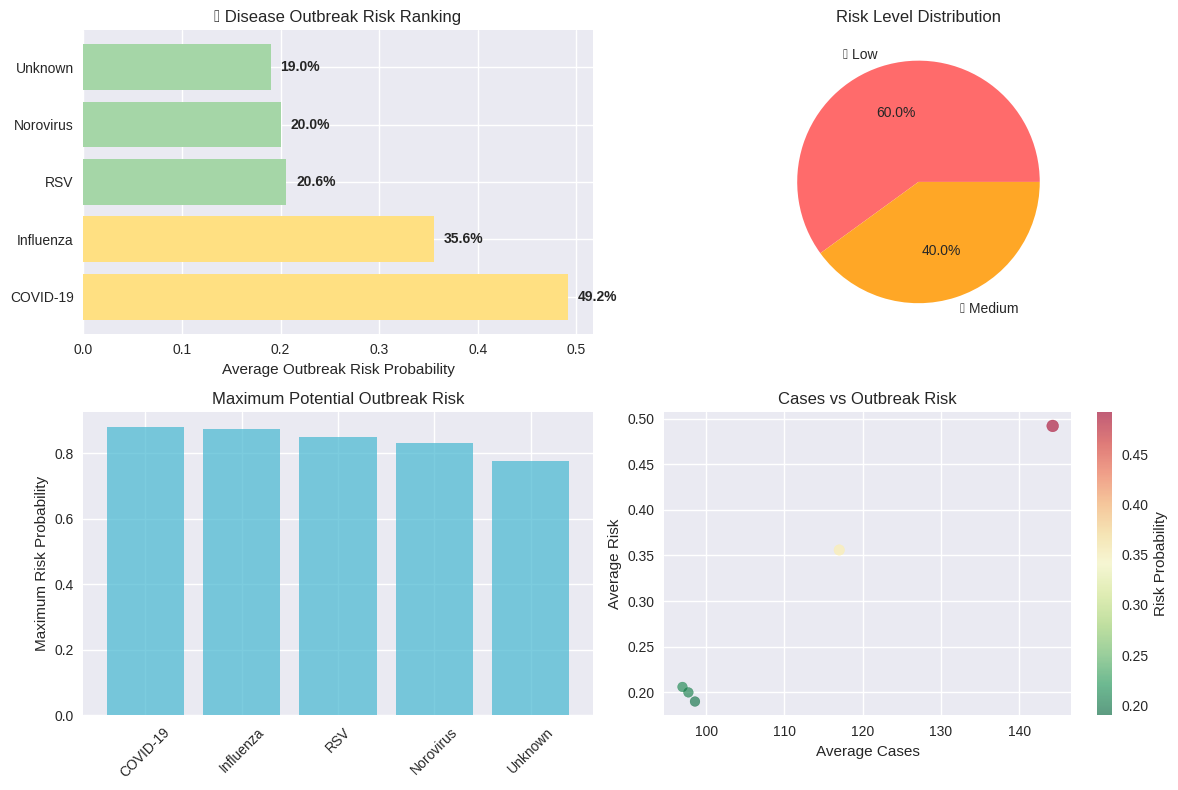

In [15]:
def plot_disease_risk_analysis(predictions_df):
    """
    Create comprehensive disease risk analysis with direct plotting
    """
    disease_stats = predictions_df.groupby('disease').agg({
        'outbreak_probability': ['mean', 'max'],
        'cases': 'mean',
        'outbreak_prediction': 'sum'
    }).round(3)
    
    disease_stats.columns = ['avg_risk', 'max_risk', 'avg_cases', 'high_risk_count']
    disease_stats = disease_stats.sort_values('avg_risk', ascending=False)
    
    disease_stats['risk_level'] = disease_stats['avg_risk'].apply(
        lambda x: '🔥 Very High' if x > 0.7 else '⚠ High' if x > 0.5 else '🔶 Medium' if x > 0.3 else '✅ Low'
    )
    
    plt.figure(figsize=(12, 8))
    
    plt.subplot(2, 2, 1)
    colors = ['#FF6B6B' if x > 0.7 else '#FFA726' if x > 0.5 else '#FFE082' if x > 0.3 else '#A5D6A7' 
              for x in disease_stats['avg_risk']]
    bars = plt.barh(range(len(disease_stats)), disease_stats['avg_risk'], color=colors)
    plt.yticks(range(len(disease_stats)), disease_stats.index)
    plt.xlabel('Average Outbreak Risk Probability')
    plt.title('🦠 Disease Outbreak Risk Ranking')
    
    for i, bar in enumerate(bars):
        width = bar.get_width()
        plt.text(width + 0.01, bar.get_y() + bar.get_height()/2, 
                f'{width:.1%}', ha='left', va='center', fontweight='bold')
    
    plt.subplot(2, 2, 2)
    risk_counts = disease_stats['risk_level'].value_counts()
    plt.pie(risk_counts.values, labels=risk_counts.index, autopct='%1.1f%%',
            colors=['#FF6B6B', '#FFA726', '#FFE082', '#A5D6A7'])
    plt.title('Risk Level Distribution')
    
    plt.subplot(2, 2, 3)
    plt.bar(disease_stats.index, disease_stats['max_risk'], 
            color='#45B7D1', alpha=0.7)
    plt.xticks(rotation=45)
    plt.ylabel('Maximum Risk Probability')
    plt.title('Maximum Potential Outbreak Risk')
    
    plt.subplot(2, 2, 4)
    scatter = plt.scatter(disease_stats['avg_cases'], disease_stats['avg_risk'], 
                         s=disease_stats['avg_cases']/2, alpha=0.6,
                         c=disease_stats['avg_risk'], cmap='RdYlGn_r')
    plt.colorbar(scatter, label='Risk Probability')
    plt.xlabel('Average Cases')
    plt.ylabel('Average Risk')
    plt.title('Cases vs Outbreak Risk')
    
    plt.tight_layout()
    plt.show()
    
    return disease_stats

disease_stats = plot_disease_risk_analysis(outbreak_predictions)

<h2 style="
  text-align:center;
  background: linear-gradient(135deg, #1e1e2e 0%, #3a0ca3 100%);
  color: #f8f9fa;
  padding: 14px 20px;
  border-radius: 10px;
  font-family: 'Segoe UI', sans-serif;
  font-weight: 700;
  letter-spacing: 1px;
  box-shadow: 0px 4px 12px rgba(0,0,0,0.35);
">
 Detailed Risk Report

</h2>

In [16]:
def print_disease_risk_report(stats_df):
    """
    Print detailed disease risk report
    """
    print("🎯 DISEASE OUTBREAK RISK PREDICTION REPORT")
    print("="*70)
    print(f"{'Disease':<12} {'Risk Level':<15} {'Avg Risk':<12} {'Max Risk':<12} {'Avg Cases':<12}")
    print("-"*70)
    
    for disease, row in stats_df.iterrows():
        print(f"{disease:<12} {row['risk_level']:<15} {row['avg_risk']*100:<11.1f}% {row['max_risk']*100:<11.1f}% {row['avg_cases']:<11.0f}")
    
    high_risk = stats_df[stats_df['risk_level'].isin(['🔥 Very High', '⚠ High'])]
    
    print("\n🚨 HIGH RISK OUTBREAK ALERTS:")
    print("="*40)
    if len(high_risk) > 0:
        for disease, row in high_risk.iterrows():
            print(f"• {disease}: {row['avg_risk']*100:.1f}% probability of outbreak")
            print(f"  Maximum potential risk: {row['max_risk']*100:.1f}%")
            print(f"  Average cases: {row['avg_cases']:.0f}")
            print()
    else:
        print("✅ No high-risk diseases detected")

print_disease_risk_report(disease_stats)

🎯 DISEASE OUTBREAK RISK PREDICTION REPORT
Disease      Risk Level      Avg Risk     Max Risk     Avg Cases   
----------------------------------------------------------------------
COVID-19     🔶 Medium        49.2       % 88.2       % 144        
Influenza    🔶 Medium        35.6       % 87.5       % 117        
RSV          ✅ Low           20.6       % 85.1       % 97         
Norovirus    ✅ Low           20.0       % 83.3       % 98         
Unknown      ✅ Low           19.0       % 77.7       % 99         

🚨 HIGH RISK OUTBREAK ALERTS:
✅ No high-risk diseases detected


<h2 style="
  text-align:center;
  background: linear-gradient(135deg, #1e1e2e 0%, #3a0ca3 100%);
  color: #f8f9fa;
  padding: 14px 20px;
  border-radius: 10px;
  font-family: 'Segoe UI', sans-serif;
  font-weight: 700;
  letter-spacing: 1px;
  box-shadow: 0px 4px 12px rgba(0,0,0,0.35);
">
Temporal Risk Trends

</h2>

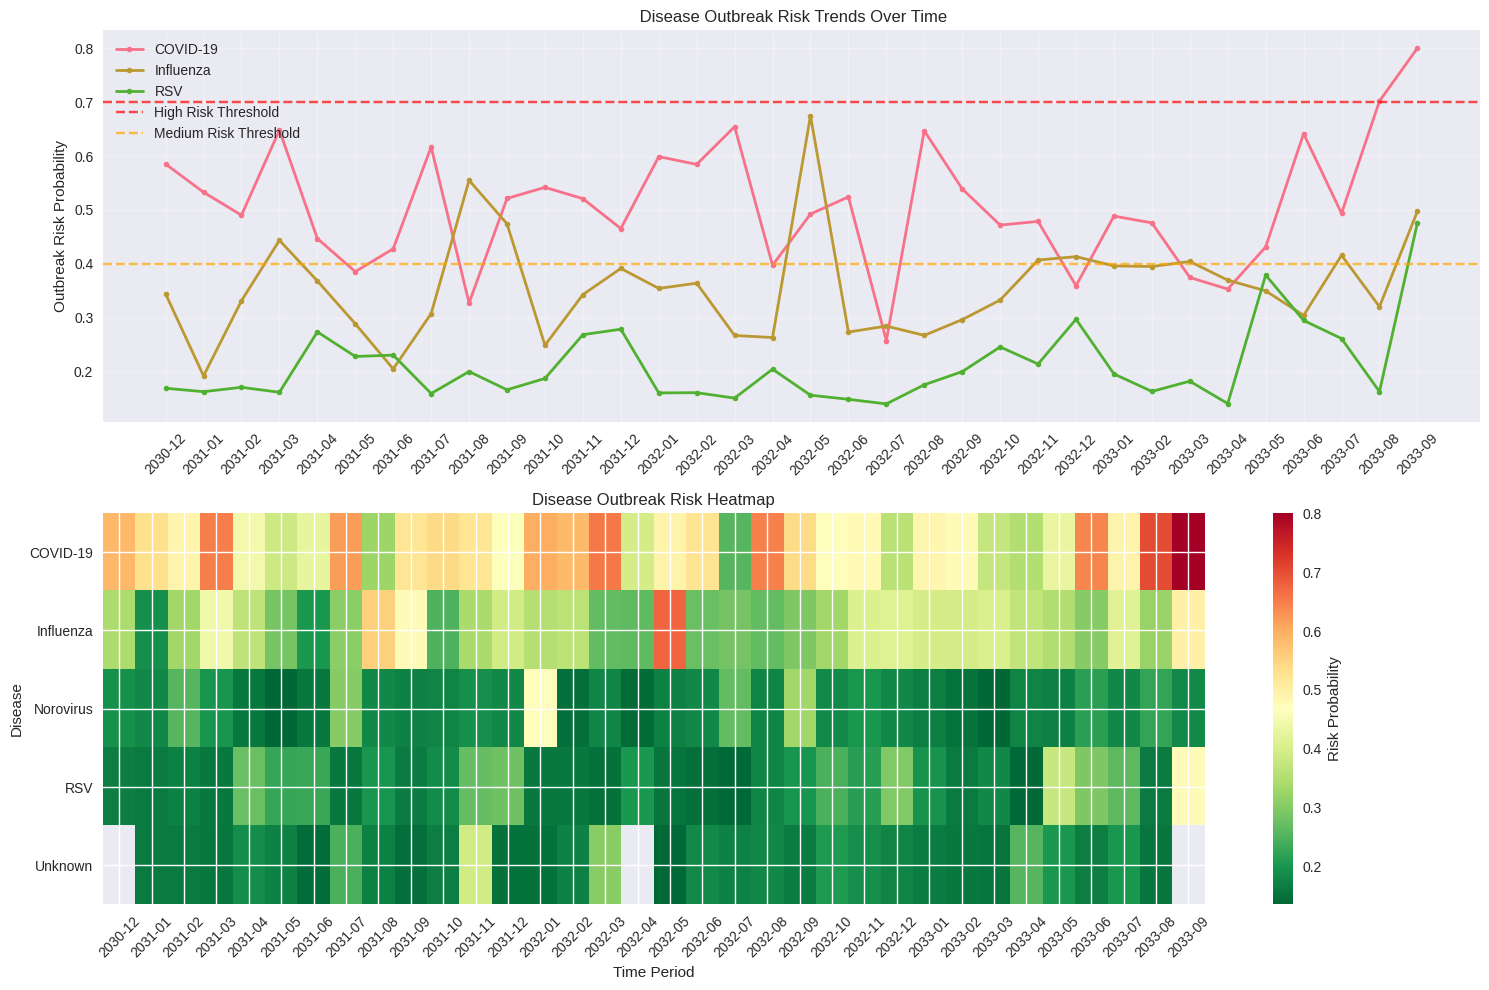

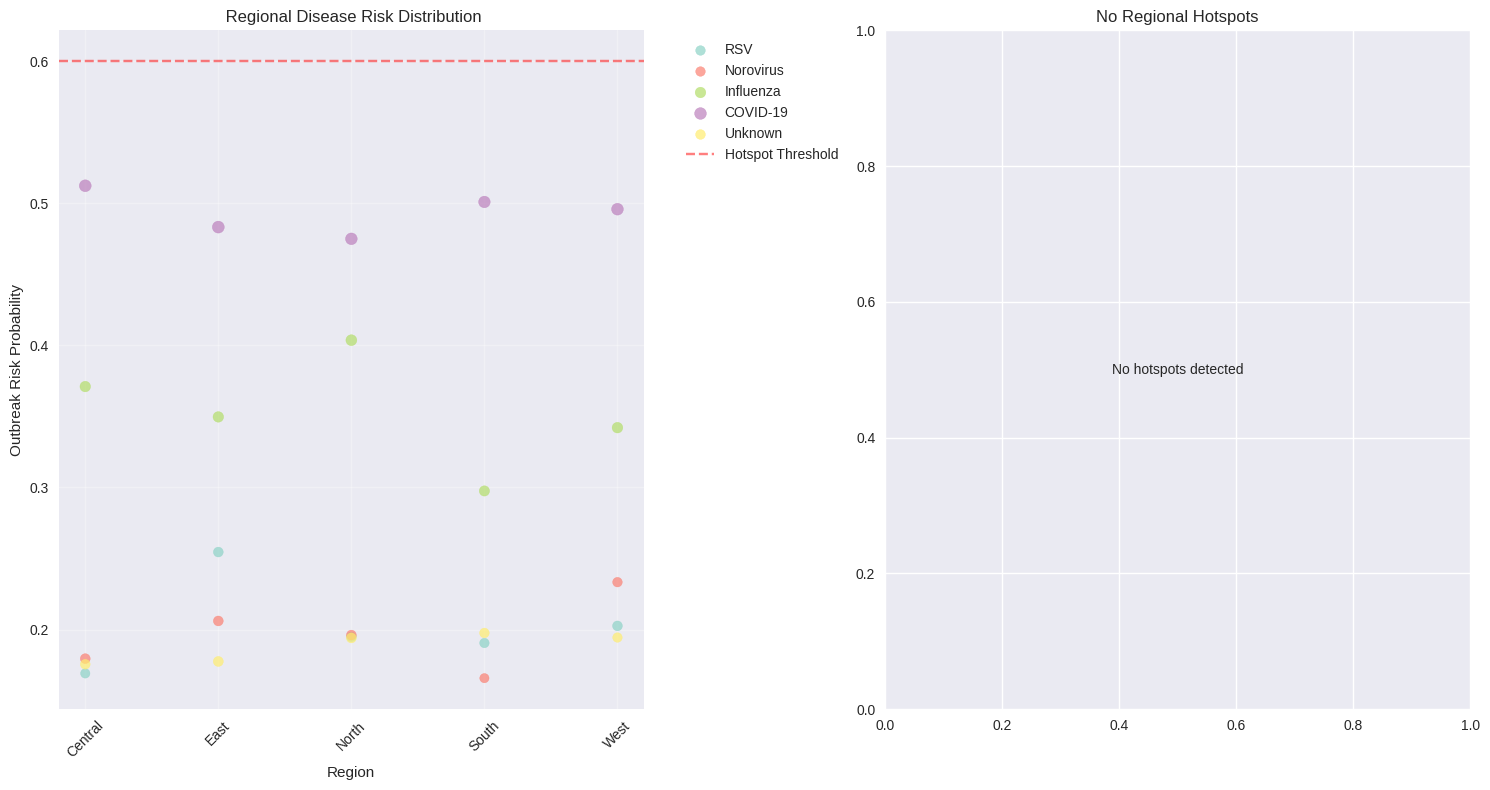

In [17]:
def plot_temporal_trends(predictions_df):
    """
    Plot disease risk trends over time
    """
    predictions_df['date'] = pd.to_datetime(predictions_df['date'])
    predictions_df['month'] = predictions_df['date'].dt.month
    predictions_df['year_month'] = predictions_df['date'].dt.strftime('%Y-%m')
    
    monthly_risk = predictions_df.groupby(['year_month', 'disease'])['outbreak_probability'].mean().reset_index()
    
    plt.figure(figsize=(15, 10))
    
    plt.subplot(2, 1, 1)
    top_diseases = disease_stats.head(3).index
    for disease in top_diseases:
        disease_data = monthly_risk[monthly_risk['disease'] == disease]
        plt.plot(disease_data['year_month'], disease_data['outbreak_probability'], 
                marker='o', linewidth=2, markersize=4, label=disease)
    
    plt.axhline(y=0.7, color='red', linestyle='--', alpha=0.7, label='High Risk Threshold')
    plt.axhline(y=0.4, color='orange', linestyle='--', alpha=0.7, label='Medium Risk Threshold')
    plt.xticks(rotation=45)
    plt.ylabel('Outbreak Risk Probability')
    plt.title(' Disease Outbreak Risk Trends Over Time')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.subplot(2, 1, 2)
    monthly_pivot = monthly_risk.pivot(index='disease', columns='year_month', values='outbreak_probability')
    plt.imshow(monthly_pivot, aspect='auto', cmap='RdYlGn_r', interpolation='nearest')
    plt.colorbar(label='Risk Probability')
    plt.yticks(range(len(monthly_pivot.index)), monthly_pivot.index)
    plt.xticks(range(len(monthly_pivot.columns)), monthly_pivot.columns, rotation=45)
    plt.title('Disease Outbreak Risk Heatmap')
    plt.xlabel('Time Period')
    plt.ylabel('Disease')
    
    plt.tight_layout()
    plt.show()

plot_temporal_trends(outbreak_predictions)

def plot_regional_hotspots(predictions_df):
    """
    Plot regional disease hotspots
    """
    regional_risk = predictions_df.groupby(['region', 'disease']).agg({
        'outbreak_probability': 'mean',
        'cases': 'mean'
    }).reset_index()
    
    hotspots = regional_risk[regional_risk['outbreak_probability'] > 0.6]
    
    plt.figure(figsize=(15, 8))
    
    plt.subplot(1, 2, 1)
    unique_diseases = predictions_df['disease'].unique()
    colors = plt.cm.Set3(np.linspace(0, 1, len(unique_diseases)))
    
    for i, disease in enumerate(unique_diseases):
        disease_data = regional_risk[regional_risk['disease'] == disease]
        plt.scatter(disease_data['region'], disease_data['outbreak_probability'],
                   s=disease_data['cases']/2, alpha=0.7, color=colors[i],
                   label=disease)
    
    plt.axhline(y=0.6, color='red', linestyle='--', alpha=0.5, label='Hotspot Threshold')
    plt.xticks(rotation=45)
    plt.ylabel('Outbreak Risk Probability')
    plt.xlabel('Region')
    plt.title(' Regional Disease Risk Distribution')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, alpha=0.3)
    
    plt.subplot(1, 2, 2)
    if len(hotspots) > 0:
        top_hotspots = hotspots.nlargest(8, 'outbreak_probability')
        bars = plt.barh(range(len(top_hotspots)), top_hotspots['outbreak_probability'],
                       color=['#FF6B6B' if x > 0.8 else '#FFA726' for x in top_hotspots['outbreak_probability']])
        
        labels = [f"{row['disease']} - {row['region']}" for _, row in top_hotspots.iterrows()]
        plt.yticks(range(len(top_hotspots)), labels)
        plt.xlabel('Risk Probability')
        plt.title(' Top Regional Hotspots')
        
        for i, bar in enumerate(bars):
            width = bar.get_width()
            plt.text(width + 0.01, bar.get_y() + bar.get_height()/2,
                    f'{width:.1%}', ha='left', va='center', fontweight='bold')
    else:
        plt.text(0.5, 0.5, 'No hotspots detected', ha='center', va='center', transform=plt.gca().transAxes)
        plt.title('No Regional Hotspots')
    
    plt.tight_layout()
    plt.show()
    
    if len(hotspots) > 0:
        print("\n REGIONAL HOTSPOT ALERTS:")
        print("="*35)
        for _, hotspot in hotspots.nlargest(5, 'outbreak_probability').iterrows():
            print(f"• {hotspot['disease']} in {hotspot['region']}: {hotspot['outbreak_probability']*100:.1f}% risk")

plot_regional_hotspots(outbreak_predictions)

In [18]:
from IPython.display import display, HTML

def print_final_prediction_summary(stats_df, predictions_df):
    """
    Print final actionable prediction summary with colored HTML table
    """
    top_3 = stats_df.head(3)
    
    html_output = """
    <style>
    .prediction-table {
        width: 100%;
        border-collapse: collapse;
        margin: 20px 0;
        font-family: Arial, sans-serif;
        box-shadow: 0 2px 10px rgba(0,0,0,0.1);
    }
    .prediction-table th {
        background: linear-gradient(135deg, #667eea 0%, #764ba2 100%);
        color: white;
        padding: 15px;
        text-align: center;
        font-size: 18px;
        font-weight: bold;
    }
    .prediction-table td {
        padding: 12px 15px;
        text-align: center;
        border-bottom: 1px solid #ddd;
    }
    .prediction-table tr:nth-child(even) {
        background-color: #f8f9fa;
    }
    .prediction-table tr:hover {
        background-color: #e3f2fd;
        transform: scale(1.01);
        transition: all 0.3s ease;
    }
    .risk-high {
        background-color: #ffebee !important;
        color: #c62828;
        font-weight: bold;
        border-radius: 20px;
        padding: 5px 15px;
    }
    .risk-medium {
        background-color: #fff3e0 !important;
        color: #ef6c00;
        font-weight: bold;
        border-radius: 20px;
        padding: 5px 15px;
    }
    .risk-low {
        background-color: #e8f5e8 !important;
        color: #2e7d32;
        font-weight: bold;
        border-radius: 20px;
        padding: 5px 15px;
    }
    .header-main {
        background: linear-gradient(135deg, #ff6b6b 0%, #ee5a24 100%);
        color: white;
        padding: 20px;
        border-radius: 10px;
        text-align: center;
        margin: 20px 0;
        font-size: 24px;
        font-weight: bold;
    }
    .recommendation-box {
        background: linear-gradient(135deg, #4ecdc4 0%, #44a08d 100%);
        color: white;
        padding: 15px;
        border-radius: 10px;
        margin: 15px 0;
    }
    .situation-box {
        padding: 15px;
        border-radius: 10px;
        margin: 15px 0;
        text-align: center;
        font-weight: bold;
        font-size: 18px;
    }
    .situation-high {
        background: linear-gradient(135deg, #ff6b6b 0%, #c23616 100%);
        color: white;
    }
    .situation-medium {
        background: linear-gradient(135deg, #ffa726 0%, #f57c00 100%);
        color: white;
    }
    .situation-low {
        background: linear-gradient(135deg, #66bb6a 0%, #388e3c 100%);
        color: white;
    }
    .confidence-meter {
        background: linear-gradient(90deg, #4caf50, #ffeb3b, #f44336);
        height: 20px;
        border-radius: 10px;
        margin: 10px 0;
        position: relative;
    }
    .confidence-fill {
        height: 100%;
        border-radius: 10px;
        background: linear-gradient(90deg, #4caf50, #8bc34a);
        transition: width 0.5s ease;
    }
    </style>
    """
    
    html_output += """
    <div class="header-main">
        🎯 FINAL OUTBREAK PREDICTION SUMMARY 🎯
    </div>
    """
    
    html_output += """
    <table class="prediction-table">
        <tr>
            <th colspan="5">🔴 TOP 3 DISEASES AT RISK OF OUTBREAK</th>
        </tr>
        <tr>
            <th style="background:#5d6d7e;">Rank</th>
            <th style="background:#5d6d7e;">Disease</th>
            <th style="background:#5d6d7e;">Outbreak Probability</th>
            <th style="background:#5d6d7e;">Risk Level</th>
            <th style="background:#5d6d7e;">Average Cases</th>
        </tr>
    """
    
    for i, (disease, data) in enumerate(top_3.iterrows(), 1):
        if data['avg_risk'] > 0.7:
            risk_class = "risk-high"
            risk_emoji = "🔥"
        elif data['avg_risk'] > 0.5:
            risk_class = "risk-medium"
            risk_emoji = "⚠"
        else:
            risk_class = "risk-low"
            risk_emoji = "✅"
        
        prob_color = "#c62828" if data['avg_risk'] > 0.7 else "#ef6c00" if data['avg_risk'] > 0.5 else "#2e7d32"
        
        html_output += f"""
        <tr>
            <td style="font-weight: bold; font-size: 16px;">#{i}</td>
            <td style="font-weight: bold; color: #2c3e50; font-size: 16px;">{disease}</td>
            <td style="color: {prob_color}; font-weight: bold; font-size: 16px;">{data['avg_risk']*100:.1f}%</td>
            <td><span class="{risk_class}">{risk_emoji} {data['risk_level']}</span></td>
            <td style="font-weight: bold;">{data['avg_cases']:.0f}</td>
        </tr>
        """
    
    html_output += "</table>"
    
    html_output += f"""
    <div class="recommendation-box">
        <h3 style="margin:0; color:white;">📅 RECOMMENDED ACTIONS</h3>
        <ul style="color:white; font-size: 16px;">
            <li><strong>Enhanced surveillance</strong> for: {", ".join(top_3.index.tolist())}</li>
            <li><strong>Pre-position resources</strong> in high-risk regions</li>
            <li><strong>Increase testing capacity</strong> for top risk diseases</li>
            <li><strong>Public awareness campaigns</strong> for prevention measures</li>
        </ul>
    </div>
    """
    
    overall_risk = stats_df['avg_risk'].mean()
    high_risk_count = len(stats_df[stats_df['risk_level'].isin(['🔥 Very High', '⚠ High'])])
    
    if overall_risk > 0.6:
        situation_class = "situation-high"
        situation_text = "🔴 HIGH RISK SITUATION"
    elif overall_risk > 0.4:
        situation_class = "situation-medium"
        situation_text = "🟡 MODERATE RISK SITUATION"
    else:
        situation_class = "situation-low"
        situation_text = "🟢 LOW RISK SITUATION"
    
    confidence = min(95, overall_risk * 100 + 30)
    
    html_output += f"""
    <div class="{situation_class}">
        <h2 style="margin:0; color:white;">{situation_text}</h2>
        <div style="display: flex; justify-content: space-around; margin-top: 15px;">
            <div>
                <h3 style="margin:0; color:white;">📊 Average Outbreak Risk</h3>
                <p style="font-size: 24px; margin:5px; color:white; font-weight: bold;">{overall_risk*100:.1f}%</p>
            </div>
            <div>
                <h3 style="margin:0; color:white;">🦠 High-Risk Diseases</h3>
                <p style="font-size: 24px; margin:5px; color:white; font-weight: bold;">{high_risk_count}</p>
            </div>
            <div>
                <h3 style="margin:0; color:white;">🎯 Model Confidence</h3>
                <p style="font-size: 24px; margin:5px; color:white; font-weight: bold;">{confidence:.1f}%</p>
            </div>
        </div>
    </div>
    """
    
    html_output += f"""
    <div style="background: white; padding: 15px; border-radius: 10px; margin: 15px 0;">
        <h3 style="color: #2c3e50; margin-bottom: 10px;">Confidence Meter</h3>
        <div class="confidence-meter">
            <div class="confidence-fill" style="width: {confidence}%;"></div>
        </div>
        <div style="display: flex; justify-content: space-between; margin-top: 5px;">
            <span style="color: #4caf50;">Low</span>
            <span style="color: #ff9800;">Medium</span>
            <span style="color: #f44336;">High</span>
        </div>
    </div>
    """
    
    html_output += """
    <table class="prediction-table">
        <tr>
            <th colspan="3">📈 ADDITIONAL STATISTICS</th>
        </tr>
        <tr>
            <th>Metric</th>
            <th>Value</th>
            <th>Status</th>
        </tr>
    """
    
    metrics = [
        ("Total Diseases Monitored", len(stats_df), "📋"),
        ("Very High Risk Diseases", len(stats_df[stats_df['risk_level'] == '🔥 Very High']), "🔴"),
        ("High Risk Diseases", len(stats_df[stats_df['risk_level'] == '⚠ High']), "🟠"),
        ("Medium Risk Diseases", len(stats_df[stats_df['risk_level'] == '🔶 Medium']), "🟡"),
        ("Low Risk Diseases", len(stats_df[stats_df['risk_level'] == '✅ Low']), "🟢")
    ]
    
    for metric, value, emoji in metrics:
        status_color = "#c62828" if "Very High" in metric else "#ef6c00" if "High" in metric else "#ffa726" if "Medium" in metric else "#66bb6a"
        html_output += f"""
        <tr>
            <td>{emoji} {metric}</td>
            <td style="font-weight: bold;">{value}</td>
            <td style="color: {status_color}; font-weight: bold;">{'⚠ Alert' if value > 0 and 'High' in metric else '✅ Normal'}</td>
        </tr>
        """
    
    html_output += "</table>"
    
    display(HTML(html_output))
    
    return top_3

top_diseases = print_final_prediction_summary(disease_stats, outbreak_predictions)